In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.decomposition import PCA
from matplotlib.patches import Rectangle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
import os
os.getcwd()

'/Users/sammitiyadav/Desktop'

In [3]:
cr_df = pd.read_excel('/Users/sammitiyadav/Desktop/Company_Data2015-1.xlsx')
cr_df.head()                      

Co_Code          Co_Name  Networth Next Year  Equity Paid Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital Employed  Total Debt  Gross Block   Net Working Capital   \
0          -1007.24     5936.03        474.30              -1076.34   
1           4458.20     7410.18       9070.86              -1098.88   
2           7714.68     6944.54       1281.54               4496.25   
3           2353.88     2326.05       1033.69              -2612.42   
4           4675.33     5740.90       1084.20               1836.23   

   Current Assets   ...  PBIDTM (%)[Latest]  PBITM (%)[Latest]  \
0            40.50  ...                0.00               0.00   
1           486.86  ...              -10.30             -39.74   
2          9097.64  ...            -5279.14           -5516.98   
3          1034.12  ...               -3.33              -7.21   
4          4685.81  ...             -295.55            -400.55   

   PBDTM (%)[Latest]  CPM (%)[Latest]  APATM (%)[Latest]  \
0               0.00             0.00               0.00   
1             -57.74           -57.74             -87.18   
2           -7780.25         -7723.67           -7961.51   
3             -48.13           -47.70             -51.58   
4            -845.88           379.79             274.79   

   Debtors Velocity (Days)  Creditors Velocity (Days)  \
0                        0                          0   
1                       29                        101   
2                       97                        558   
3                       93                         63   
4                     3887                        346   

   Inventory Velocity (Days)  Value of Output/Total Assets  \
0                       45.0                          0.00   
1                        2.0                          0.31   
2                        0.0                         -0.03   
3                        2.0                          0.24   
4                        0.0                          0.01   

   Value of Output/Gross Block  
0                         0.00  
1                         0.24  
2                        -0.26  
3                         1.90  
4                         0.05  

[5 rows x 67 columns]

In [4]:
cr_df.iloc[:,0:21].describe(include = 'all',).T

count unique            top freq     mean  \
Co_Code                              3586    NaN            NaN  NaN  16065.4   
Co_Name                              3586   3586  Shyam Century    1      NaN   
Networth Next Year                   3586    NaN            NaN  NaN  725.045   
Equity Paid Up                       3586    NaN            NaN  NaN  62.9666   
Networth                             3586    NaN            NaN  NaN  649.746   
Capital Employed                     3586    NaN            NaN  NaN  2799.61   
Total Debt                           3586    NaN            NaN  NaN  1994.82   
Gross Block                          3586    NaN            NaN  NaN  594.179   
Net Working Capital                  3586    NaN            NaN  NaN   410.81   
Current Assets                       3586    NaN            NaN  NaN  1960.35   
Current Liabilities and Provisions   3586    NaN            NaN  NaN  391.992   
Total Assets/Liabilities             3586    NaN            NaN  NaN  1778.45   
Gross Sales                          3586    NaN            NaN  NaN  1123.74   
Net Sales                            3586    NaN            NaN  NaN   1079.7   
Other Income                         3586    NaN            NaN  NaN  48.7298   
Value Of Output                      3586    NaN            NaN  NaN  1077.19   
Cost of Production                   3586    NaN            NaN  NaN  798.545   
Selling Cost                         3586    NaN            NaN  NaN   25.555   
PBIDT                                3586    NaN            NaN  NaN  248.175   
PBDT                                 3586    NaN            NaN  NaN  116.269   
PBIT                                 3586    NaN            NaN  NaN  217.659   

                                         std      min      25%     50%  \
Co_Code                              19776.8        4  3029.25  6077.5   
Co_Name                                  NaN      NaN      NaN     NaN   
Networth Next Year                   4769.68  -8021.6    3.985  19.015   
Equity Paid Up                       778.762        0     3.75    8.29   
Networth                             4091.99 -7027.48   3.8925   18.58   
Capital Employed                     26975.1 -1824.75   7.6025   39.09   
Total Debt                           23652.8    -0.72     0.03    7.49   
Gross Block                          4871.55   -41.19     0.57   15.87   
Net Working Capital                  6301.22 -13162.4   0.9425  10.145   
Current Assets                       22577.6    -0.91        4   24.54   
Current Liabilities and Provisions      2675    -0.23   0.7325   9.225   
Total Assets/Liabilities             11437.6    -4.51   10.555   52.01   
Gross Sales                          10603.7   -62.59   1.4425   31.21   
Net Sales                            9996.57   -62.59     1.44   30.44   
Other Income                         426.041  -448.72     0.02    0.45   
Value Of Output                      9843.88   -119.1   1.4125  30.895   
Cost of Production                    9076.7   -22.65     0.94   25.99   
Selling Cost                         194.244        0        0    0.16   
PBIDT                                1949.59 -4655.14     0.04   2.045   
PBDT                                   956.2 -5874.53        0   0.795   
PBIT                                 1850.97 -4812.95        0    1.15   

                                         75%      max  
Co_Code                              24269.5    72493  
Co_Name                                  NaN      NaN  
Networth Next Year                   123.803   111729  
Equity Paid Up                       19.5175  42263.5  
Networth                             117.297  81657.4  
Capital Employed                     226.605   714001  
Total Debt                             72.35   652824  
Gross Block                          131.895   128478  
Net Working Capital                   61.175   223258  
Current Assets                       135.278   721166  
Current 

In [5]:
cr_df.iloc[:,21:68].describe(include = 'all',).T

count         mean            std  \
PBT                                  3586.0    85.752909     799.925768   
PAT                                  3586.0    61.218313     620.298432   
Adjusted PAT                         3586.0    60.058963     580.432912   
CP                                   3586.0    91.734200     780.790561   
Revenue earnings in forex            3586.0   131.165270    1150.730209   
Revenue expenses in forex            3586.0   256.327002    4132.339619   
Capital expenses in forex            3586.0     7.655689     111.432070   
Book Value (Unit Curr)               3586.0   157.237836    1622.664105   
Book Value (Adj.) (Unit Curr)        3582.0  2243.152917  128283.728186   
Market Capitalisation                3586.0  1664.092387   12805.173084   
CEPS (annualised) (Unit Curr)        3586.0    36.018709     828.420796   
Cash Flow From Operating Activities  3586.0    65.770750    1455.048376   
Cash Flow From Investing Activities  3586.0   -60.870365     701.974713   
Cash Flow From Financing Activities  3586.0    11.436453    1272.257361   
ROG-Net Worth (%)                    3586.0  1237.624576   41041.930017   
ROG-Capital Employed (%)             3586.0  2988.884612  126472.870285   
ROG-Gross Block (%)                  3586.0    37.554306     893.619402   
ROG-Gross Sales (%)                  3586.0   242.672962    6103.527897   
ROG-Net Sales (%)                    3586.0   242.588530    6103.487655   
ROG-Cost of Production (%)           3586.0   310.488405    5573.215095   
ROG-Total Assets (%)                 3586.0  2793.282621  125941.653747   
ROG-PBIDT (%)                        3586.0   375.852181   23278.396117   
ROG-PBDT (%)                         3586.0   336.379947   20353.396660   
ROG-PBIT (%)                         3586.0   374.699958   22462.789381   
ROG-PBT (%)                          3586.0   224.070248   19659.232661   
ROG-PAT (%)                          3586.0   112.231654   13480.515287   
ROG-CP (%)                           3586.0   221.091523   13980.202791   
ROG-Revenue earnings in forex (%)    3586.0    37.227844     658.666041   
ROG-Revenue expenses in forex (%)    3586.0   364.863221   15233.643027   
ROG-Market Capitalisation (%)        3586.0    63.682220    1047.928144   
Current Ratio[Latest]                3585.0    12.056603     108.410131   
Fixed Assets Ratio[Latest]           3585.0    51.538840     681.150910   
Inventory Ratio[Latest]              3585.0    37.798946     458.189394   
Debtors Ratio[Latest]                3585.0    33.026996     489.563498   
Total Asset Turnover Ratio[Latest]   3585.0     1.237236       2.673228   
Interest Cover Ratio[Latest]         3585.0    16.387894     351.737840   
PBIDTM (%)[Latest]                   3585.0   -51.162890    1795.131025   
PBITM (%)[Latest]                    3585.0  -109.213414    3057.635870   
PBDTM (%)[Latest]                    3585.0  -311.570357   10921.592639   
CPM (%)[Latest]                      3585.0  -307.005632   10676.149629   
APATM (%)[Latest]                    3585.0  -365.056187   12500.051387   
Debtors Velocity (Days)              3586.0   603.894032   10636.759580   
Creditors Velocity (Days)            3586.0  2057.854992   54169.479197   
Inventory Velocity (Days)            3483.0    79.644559     137.847792   
Value of Output/Total Assets         3586.0     0.819757       1.201400   
Value of Output/Gross Block          3586.0    61.884548     976.824352   

                                           min      25%     50%       75%  \
PBT                                   -6032.34  -0.0600   0.310    7.4225   
PAT                                   -6032.34  -0.0600   0.255    5.5400   
Adjusted PAT                          -4418.72  -0.0900   0.210    5.3425   
CP                                    -5874.53   0.0000   0.740   10.9100   
Revenue earnings in forex                 0.00   0.0000   0.000    7.2000   
Revenue expenses in forex                 0.00   0

# Univarite Analysis

# Distribution of variables by Histogram

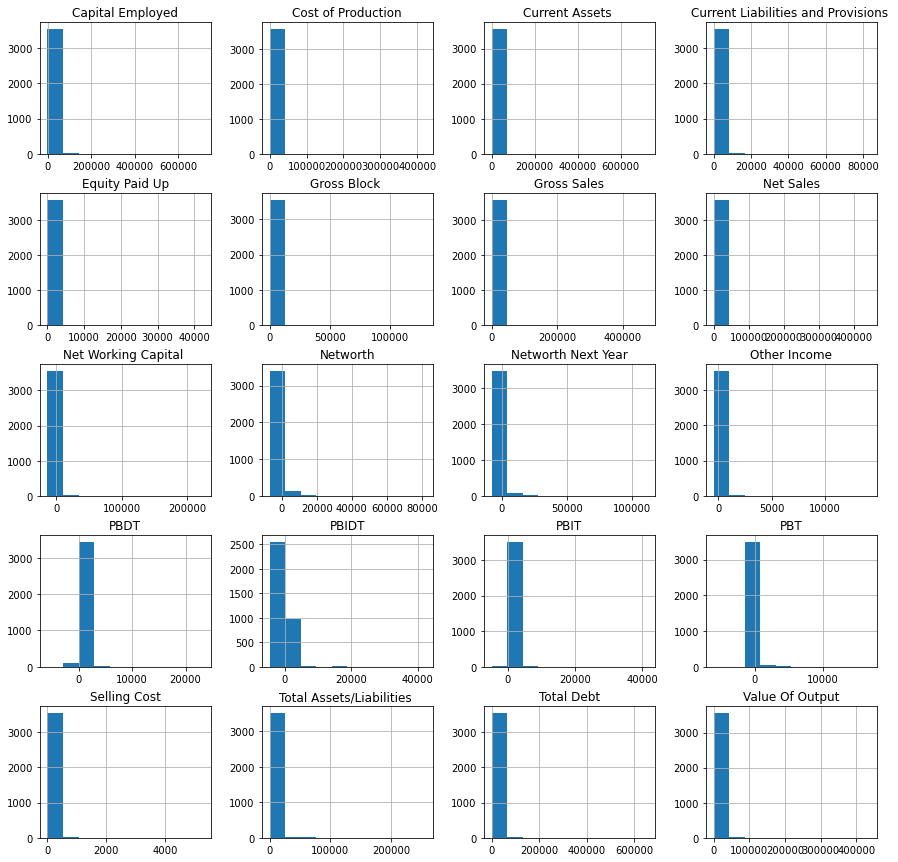

In [6]:
cr_df.iloc[:,2:22].hist(figsize=(15,15))
plt.show()

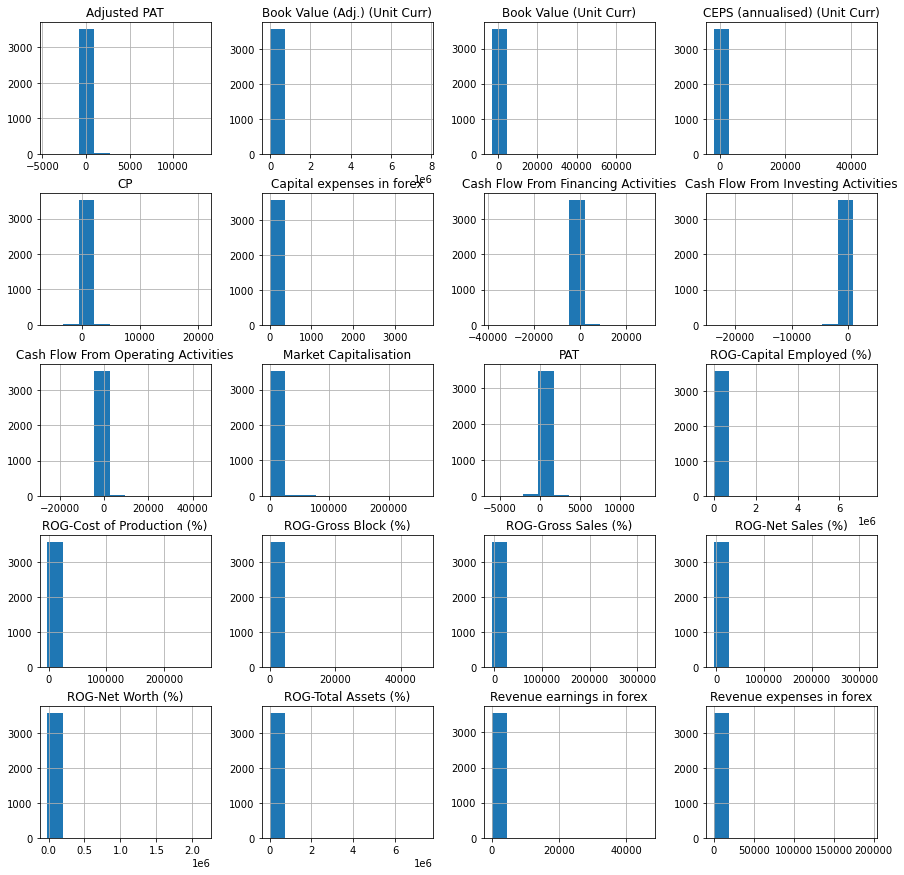

In [7]:
cr_df.iloc[:,22:42].hist(figsize=(15,15))
plt.show()

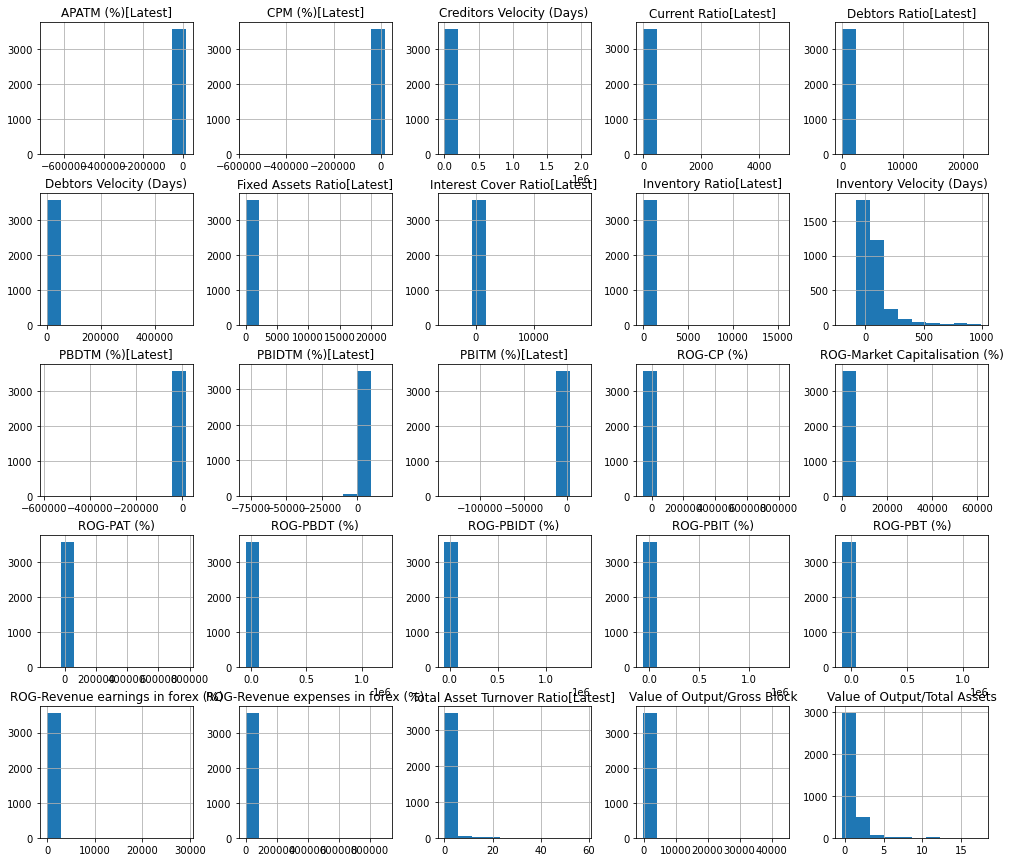

In [8]:
cr_df.iloc[:,42:68].hist(figsize=(17,15))
plt.show()

The distribution for almost all the variables looks extermely skewd to the left (i.e. in the first 25% in the quantile). Few Variables are right skewed.

# Outliers

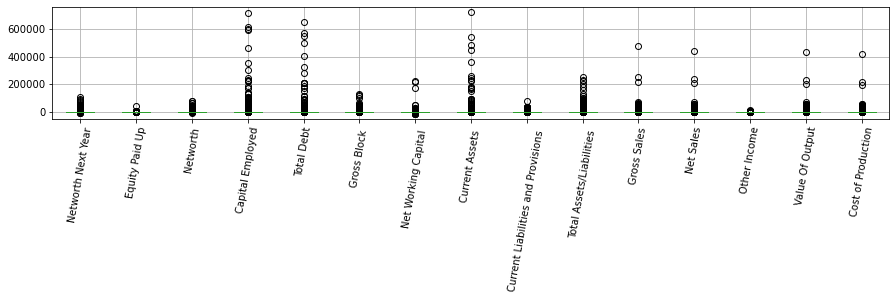

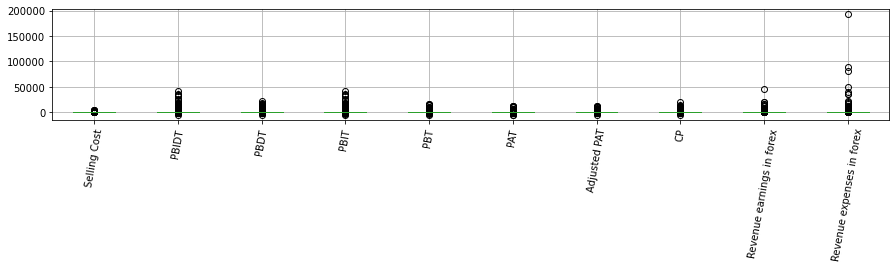

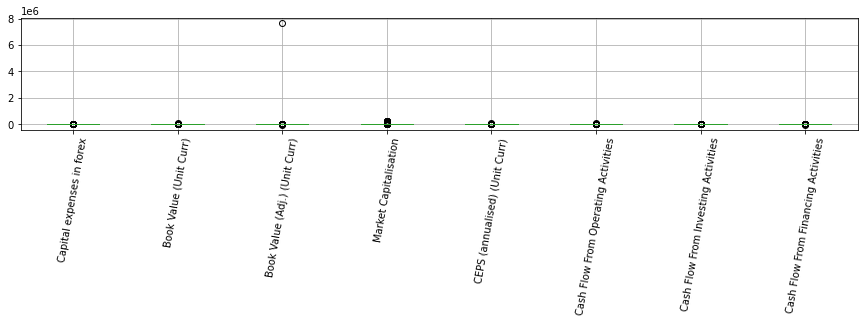

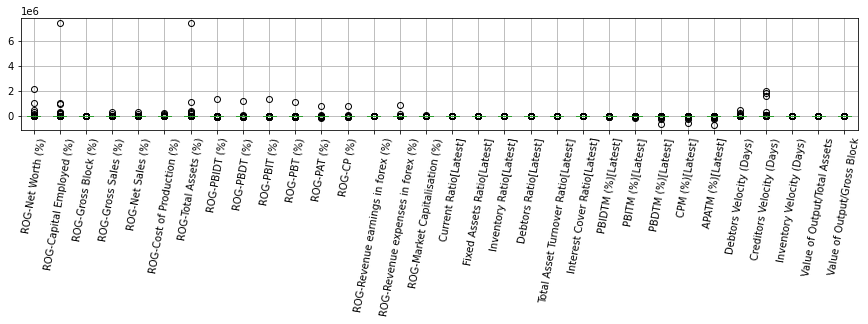

In [9]:
#check outliers
plt.figure(figsize=(15,7))
plt.subplot(3,1,1)
cr_df.iloc[:,2:17].boxplot()
plt.xticks(rotation = 80)

plt.figure(figsize=(15,7))
plt.subplot(3,1,2)
cr_df.iloc[:,17:27].boxplot()
plt.xticks(rotation = 80)

plt.figure(figsize=(15,7))
plt.subplot(3,1,2)
cr_df.iloc[:,27:35].boxplot()
plt.xticks(rotation = 80)

plt.figure(figsize=(15,7))
plt.subplot(3,1,3)
cr_df.iloc[:,35:68].boxplot()
plt.xticks(rotation = 80)
plt.show()

In [10]:
cr_df_new = cr_df.iloc[:,2:68]
cr_df_new.head()

Networth Next Year  Equity Paid Up  Networth  Capital Employed  Total Debt  \
0            -8021.60          419.36  -7027.48          -1007.24     5936.03   
1            -3986.19         1954.93  -2968.08           4458.20     7410.18   
2            -3192.58           53.84    506.86           7714.68     6944.54   
3            -3054.51          157.30   -623.49           2353.88     2326.05   
4            -2967.36           50.30  -1070.83           4675.33     5740.90   

   Gross Block   Net Working Capital   Current Assets   \
0        474.30              -1076.34            40.50   
1       9070.86              -1098.88           486.86   
2       1281.54               4496.25          9097.64   
3       1033.69              -2612.42          1034.12   
4       1084.20               1836.23          4685.81   

   Current Liabilities and Provisions   Total Assets/Liabilities   ...  \
0                              1116.85                     109.60  ...   
1                              1585.74                    6043.94  ...   
2                              4601.39                   12316.07  ...   
3                              3646.54                    6000.42  ...   
4                              2849.58                    7524.91  ...   

   PBIDTM (%)[Latest]  PBITM (%)[Latest]  PBDTM (%)[Latest]  CPM (%)[Latest]  \
0                0.00               0.00               0.00             0.00   
1              -10.30             -39.74             -57.74           -57.74   
2            -5279.14           -5516.98           -7780.25         -7723.67   
3               -3.33              -7.21             -48.13           -47.70   
4             -295.55            -400.55            -845.88           379.79   

   APATM (%)[Latest]  Debtors Velocity (Days)  Creditors Velocity (Days)  \
0               0.00                        0                          0   
1             -87.18                       29                        101   
2           -7961.51                       97                        558   
3             -51.58                       93                         63   
4             274.79                     3887                        346   

   Inventory Velocity (Days)  Value of Output/Total Assets  \
0                       45.0                          0.00   
1                        2.0                          0.31   
2                        0.0                         -0.03   
3                        2.0                          0.24   
4                        0.0                          0.01   

   Value of Output/Gross Block  
0                         0.00  
1                         0.24  
2                        -0.26  
3                         1.90  
4                         0.05  

[5 rows x 65 columns]

Almost all the variables have outliers, they will be treated using IQR

# Outlier Treatment using IQR

In [11]:
for col in cr_df_new.columns:
    sorted(col)
    IQR = cr_df_new[col].quantile(0.75) - cr_df_new[col].quantile(0.25)
    #print("\n",IQR)
    upper = cr_df_new[col].quantile(0.75) + 1.5*IQR
    lower = cr_df_new[col].quantile(0.25) - 1.5*IQR
    cr_df_new[col] = np.where(cr_df_new[col] > upper, upper, cr_df_new[col])
    cr_df_new[col] = np.where(cr_df_new[col] < lower, lower, cr_df_new[col])

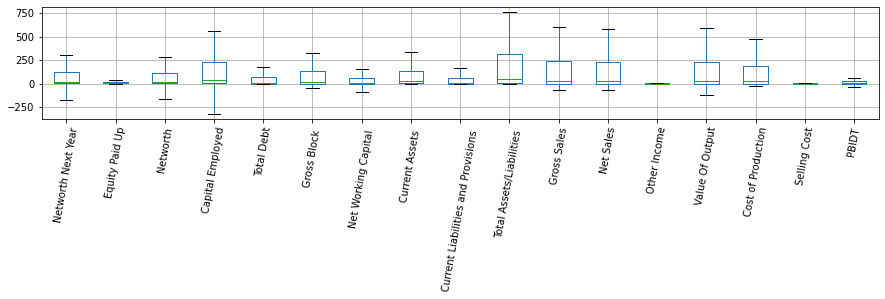

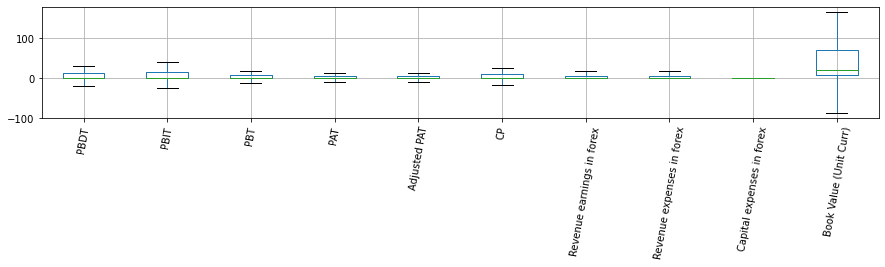

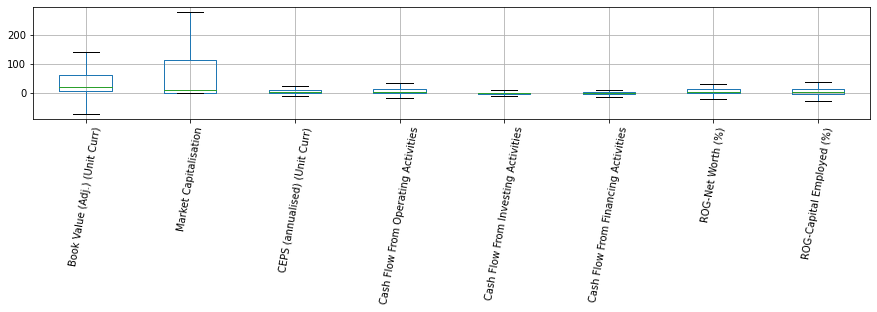

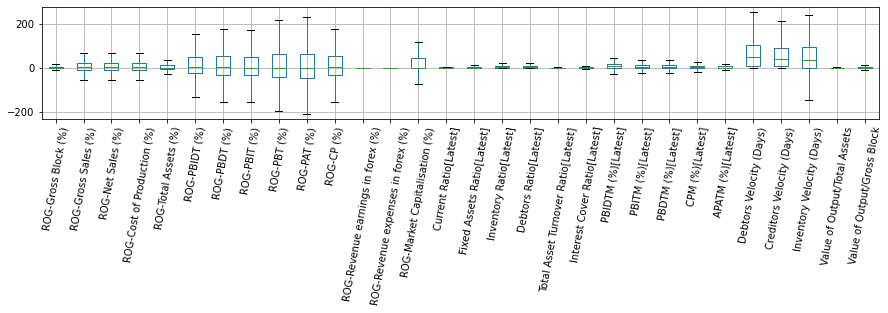

In [12]:
plt.figure(figsize=(15,7))
plt.subplot(3,1,1)
cr_df_new.iloc[:,0:17].boxplot()
plt.xticks(rotation = 80)

plt.figure(figsize=(15,7))
plt.subplot(3,1,2)
cr_df_new.iloc[:,17:27].boxplot()
plt.xticks(rotation = 80)

plt.figure(figsize=(15,7))
plt.subplot(3,1,2)
cr_df_new.iloc[:,27:35].boxplot()
plt.xticks(rotation = 80)

plt.figure(figsize=(15,7))
plt.subplot(3,1,3)
cr_df_new.iloc[:,35:68].boxplot()
plt.xticks(rotation = 80)
plt.show()

In [13]:
#Dataset after Outlier treatment 
cr_df_new.head()

Networth Next Year  Equity Paid Up  Networth  Capital Employed  Total Debt  \
0          -175.74125        43.16875  -166.215        -320.90125      180.83   
1          -175.74125        43.16875  -166.215         555.10875      180.83   
2          -175.74125        43.16875   287.405         555.10875      180.83   
3          -175.74125        43.16875  -166.215         555.10875      180.83   
4          -175.74125        43.16875  -166.215         555.10875      180.83   

   Gross Block   Net Working Capital   Current Assets   \
0      328.8825             -89.40625         40.50000   
1      328.8825             -89.40625        332.19375   
2      328.8825             151.52375        332.19375   
3      328.8825             -89.40625        332.19375   
4      328.8825             151.52375        332.19375   

   Current Liabilities and Provisions   Total Assets/Liabilities   ...  \
0                            163.02625                   109.6000  ...   
1                            163.02625                   760.5175  ...   
2                            163.02625                   760.5175  ...   
3                            163.02625                   760.5175  ...   
4                            163.02625                   760.5175  ...   

   PBIDTM (%)[Latest]  PBITM (%)[Latest]  PBDTM (%)[Latest]  CPM (%)[Latest]  \
0               0.000              0.000              0.000            0.000   
1             -10.300            -21.435            -21.165          -17.085   
2             -28.485            -21.435            -21.165          -17.085   
3              -3.330             -7.210            -21.165          -17.085   
4             -28.485            -21.435            -21.165           28.475   

   APATM (%)[Latest]  Debtors Velocity (Days)  Creditors Velocity (Days)  \
0              0.000                      0.0                        0.0   
1            -11.115                     29.0                      101.0   
2            -11.115                     97.0                      210.5   
3            -11.115                     93.0                       63.0   
4             18.525                    253.0                      210.5   

   Inventory Velocity (Days)  Value of Output/Total Assets  \
0                       45.0                          0.00   
1                        2.0                          0.31   
2                        0.0                         -0.03   
3                        2.0                          0.24   
4                        0.0                          0.01   

   Value of Output/Gross Block  
0                         0.00  
1                         0.24  
2                        -0.26  
3                         1.90  
4                         0.05  

[5 rows x 65 columns]

# Bivariate Analysis 

# Heatmap

In [14]:
corr = cr_df.iloc[:,3:].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

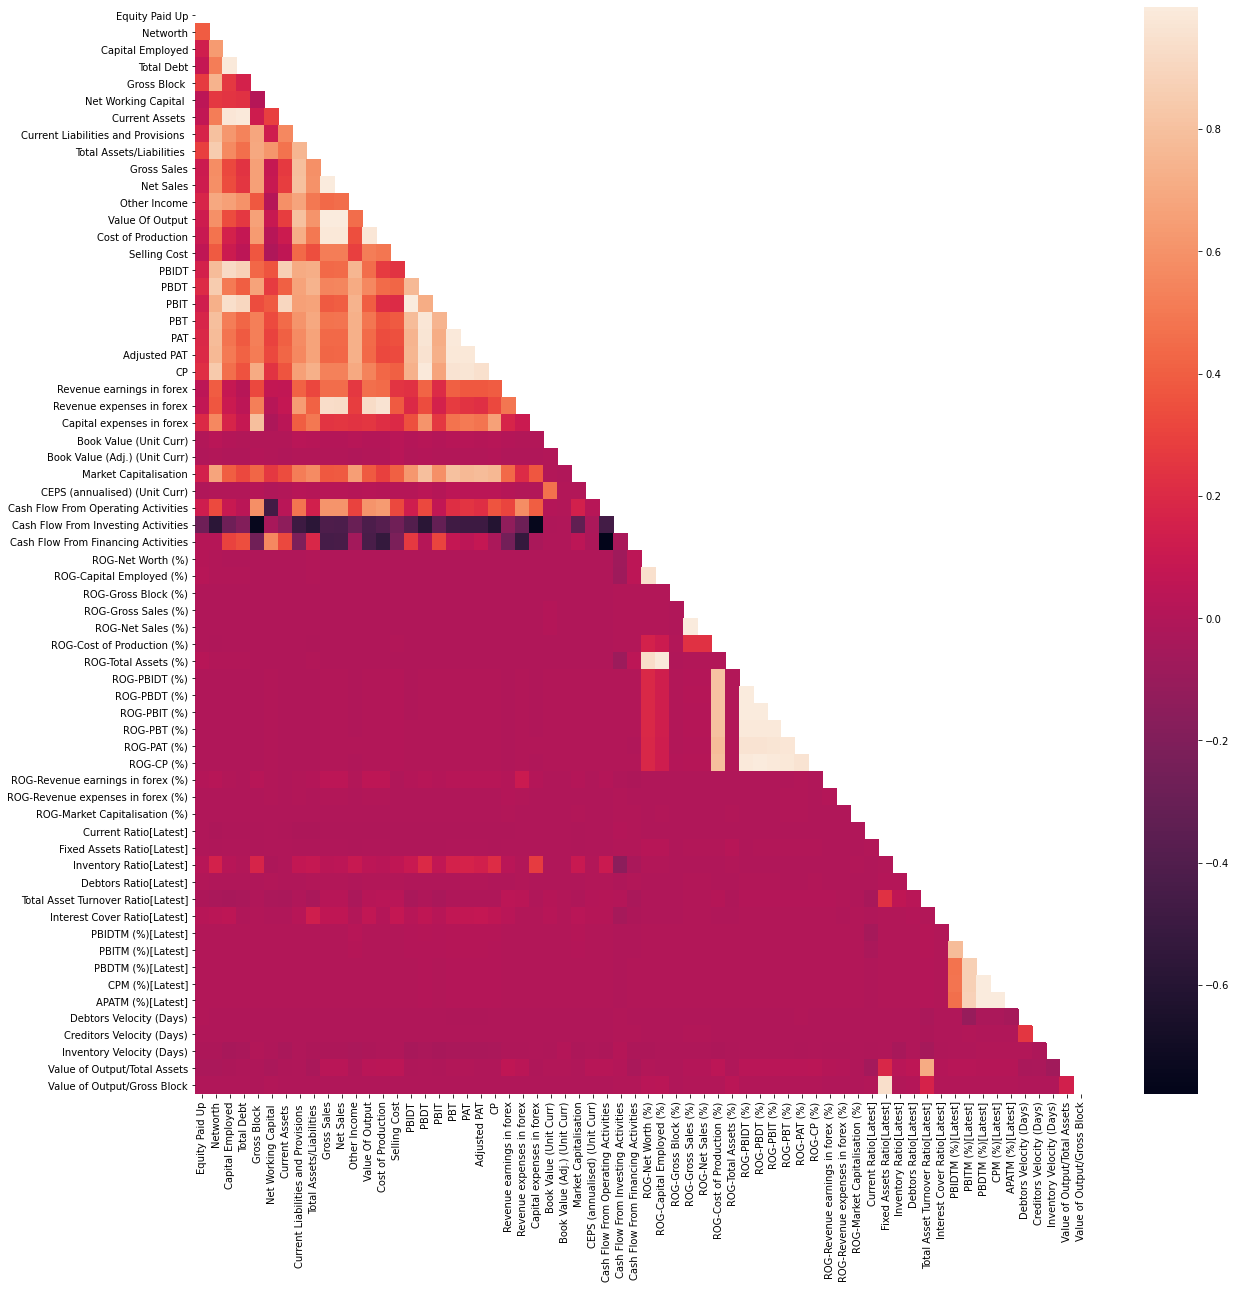

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, mask=mask)
plt.show()

In [16]:
#check for missing values
cr_df_new.iloc[:,0:21].isna().sum()

Networth Next Year                     0
Equity Paid Up                         0
Networth                               0
Capital Employed                       0
Total Debt                             0
Gross Block                            0
Net Working Capital                    0
Current Assets                         0
Current Liabilities and Provisions     0
Total Assets/Liabilities               0
Gross Sales                            0
Net Sales                              0
Other Income                           0
Value Of Output                        0
Cost of Production                     0
Selling Cost                           0
PBIDT                                  0
PBDT                                   0
PBIT                                   0
PBT                                    0
PAT                                    0
dtype: int64

In [17]:
#check for missing values
cr_df_new.iloc[:,21:68].isna().sum()

Adjusted PAT                             0
CP                                       0
Revenue earnings in forex                0
Revenue expenses in forex                0
Capital expenses in forex                0
Book Value (Unit Curr)                   0
Book Value (Adj.) (Unit Curr)            4
Market Capitalisation                    0
CEPS (annualised) (Unit Curr)            0
Cash Flow From Operating Activities      0
Cash Flow From Investing Activities      0
Cash Flow From Financing Activities      0
ROG-Net Worth (%)                        0
ROG-Capital Employed (%)                 0
ROG-Gross Block (%)                      0
ROG-Gross Sales (%)                      0
ROG-Net Sales (%)                        0
ROG-Cost of Production (%)               0
ROG-Total Assets (%)                     0
ROG-PBIDT (%)                            0
ROG-PBDT (%)                             0
ROG-PBIT (%)                             0
ROG-PBT (%)                              0
ROG-PAT (%)

# Missing Value Treatment

The variable 'Inventory Velocity (Days)' has 103 missing value, the variable was just treated for outliers 
hence mean was used to substitute for missing values

Similarly, the variable Book Value (Adj.) (Unit Curr), Current Ratio[Latest], Fixed Assets Ratio[Latest], 
Inventory Ratio[Latest], Debtors Ratio[Latest], Total Asset Turnover Ratio[Latest], Interest Cover Ratio[Latest], 
PBIDTM (%)[Latest], PBITM (%)[Latest], PBDTM (%)[Latest], CPM (%)[Latest], APATM (%)[Latest], Debtors Velocity (Days)
were treated for missing values using mean

In [18]:
for i in cr_df_new.columns:
    if (cr_df_new[i].isna().sum() > 0):
        cr_df_new[i].fillna(value = cr_df_new[i].mean(), inplace = True)

In [19]:
cr_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 65 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Networth Next Year                   3586 non-null   float64
 1   Equity Paid Up                       3586 non-null   float64
 2   Networth                             3586 non-null   float64
 3   Capital Employed                     3586 non-null   float64
 4   Total Debt                           3586 non-null   float64
 5   Gross Block                          3586 non-null   float64
 6   Net Working Capital                  3586 non-null   float64
 7   Current Assets                       3586 non-null   float64
 8   Current Liabilities and Provisions   3586 non-null   float64
 9   Total Assets/Liabilities             3586 non-null   float64
 10  Gross Sales                          3586 non-null   float64
 11  Net Sales                     

In [20]:
cr_scaling = cr_df_new.copy()

In [21]:
cr_scaling.drop('Networth Next Year', axis =1, inplace = True)

In [22]:
cr_scaling.head()

Equity Paid Up  Networth  Capital Employed  Total Debt  Gross Block   \
0        43.16875  -166.215        -320.90125      180.83      328.8825   
1        43.16875  -166.215         555.10875      180.83      328.8825   
2        43.16875   287.405         555.10875      180.83      328.8825   
3        43.16875  -166.215         555.10875      180.83      328.8825   
4        43.16875  -166.215         555.10875      180.83      328.8825   

   Net Working Capital   Current Assets   Current Liabilities and Provisions   \
0             -89.40625         40.50000                            163.02625   
1             -89.40625        332.19375                            163.02625   
2             151.52375        332.19375                            163.02625   
3             -89.40625        332.19375                            163.02625   
4             151.52375        332.19375                            163.02625   

   Total Assets/Liabilities   Gross Sales  ...  PBIDTM (%)[Latest]  \
0                   109.6000      0.00000  ...               0.000   
1                   760.5175    603.46125  ...             -10.300   
2                   760.5175    392.13000  ...             -28.485   
3                   760.5175    603.46125  ...              -3.330   
4                   760.5175     38.72000  ...             -28.485   

   PBITM (%)[Latest]  PBDTM (%)[Latest]  CPM (%)[Latest]  APATM (%)[Latest]  \
0              0.000              0.000            0.000              0.000   
1            -21.435            -21.165          -17.085            -11.115   
2            -21.435            -21.165          -17.085            -11.115   
3             -7.210            -21.165          -17.085            -11.115   
4            -21.435            -21.165           28.475             18.525   

   Debtors Velocity (Days)  Creditors Velocity (Days)  \
0                      0.0                        0.0   
1                     29.0                      101.0   
2                     97.0                      210.5   
3                     93.0                       63.0   
4                    253.0                      210.5   

   Inventory Velocity (Days)  Value of Output/Total Assets  \
0                       45.0                          0.00   
1                        2.0                          0.31   
2                        0.0                         -0.03   
3                        2.0                          0.24   
4                        0.0                          0.01   

   Value of Output/Gross Block  
0                         0.00  
1                         0.24  
2                        -0.26  
3                         1.90  
4                         0.05  

[5 rows x 64 columns]

In [23]:
cr_df_new.head()

Networth Next Year  Equity Paid Up  Networth  Capital Employed  Total Debt  \
0          -175.74125        43.16875  -166.215        -320.90125      180.83   
1          -175.74125        43.16875  -166.215         555.10875      180.83   
2          -175.74125        43.16875   287.405         555.10875      180.83   
3          -175.74125        43.16875  -166.215         555.10875      180.83   
4          -175.74125        43.16875  -166.215         555.10875      180.83   

   Gross Block   Net Working Capital   Current Assets   \
0      328.8825             -89.40625         40.50000   
1      328.8825             -89.40625        332.19375   
2      328.8825             151.52375        332.19375   
3      328.8825             -89.40625        332.19375   
4      328.8825             151.52375        332.19375   

   Current Liabilities and Provisions   Total Assets/Liabilities   ...  \
0                            163.02625                   109.6000  ...   
1                            163.02625                   760.5175  ...   
2                            163.02625                   760.5175  ...   
3                            163.02625                   760.5175  ...   
4                            163.02625                   760.5175  ...   

   PBIDTM (%)[Latest]  PBITM (%)[Latest]  PBDTM (%)[Latest]  CPM (%)[Latest]  \
0               0.000              0.000              0.000            0.000   
1             -10.300            -21.435            -21.165          -17.085   
2             -28.485            -21.435            -21.165          -17.085   
3              -3.330             -7.210            -21.165          -17.085   
4             -28.485            -21.435            -21.165           28.475   

   APATM (%)[Latest]  Debtors Velocity (Days)  Creditors Velocity (Days)  \
0              0.000                      0.0                        0.0   
1            -11.115                     29.0                      101.0   
2            -11.115                     97.0                      210.5   
3            -11.115                     93.0                       63.0   
4             18.525                    253.0                      210.5   

   Inventory Velocity (Days)  Value of Output/Total Assets  \
0                       45.0                          0.00   
1                        2.0                          0.31   
2                        0.0                         -0.03   
3                        2.0                          0.24   
4                        0.0                          0.01   

   Value of Output/Gross Block  
0                         0.00  
1                         0.24  
2                        -0.26  
3                         1.90  
4                         0.05  

[5 rows x 65 columns]

# Scaling the data using zscore 

In [24]:
scaled_df = cr_scaling.apply(zscore)
scaled_df.head()

/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


Equity Paid Up  Networth  Capital Employed  Total Debt  Gross Block   \
0         2.08394 -2.124536         -2.277679    1.955653      2.011189   
1         2.08394 -2.124536          1.937167    1.955653      2.011189   
2         2.08394  1.892586          1.937167    1.955653      2.011189   
3         2.08394 -2.124536          1.937167    1.955653      2.011189   
4         2.08394 -2.124536          1.937167    1.955653      2.011189   

   Net Working Capital   Current Assets   Current Liabilities and Provisions   \
0             -2.126873        -0.416700                             1.963318   
1             -2.126873         1.972885                             1.963318   
2              1.933358         1.972885                             1.963318   
3             -2.126873         1.972885                             1.963318   
4              1.933358         1.972885                             1.963318   

   Total Assets/Liabilities   Gross Sales  ...  PBIDTM (%)[Latest]  \
0                  -0.352887    -0.711425  ...           -0.557187   
1                   1.968666     1.980032  ...           -1.101221   
2                   1.968666     1.037488  ...           -2.061731   
3                   1.968666     1.980032  ...           -0.733074   
4                   1.968666    -0.538733  ...           -2.061731   

   PBITM (%)[Latest]  PBDTM (%)[Latest]  CPM (%)[Latest]  APATM (%)[Latest]  \
0          -0.472162          -0.441329        -0.433010          -0.323282   
1          -1.874992          -1.842077        -1.823248          -1.596810   
2          -1.874992          -1.842077        -1.823248          -1.596810   
3          -0.944026          -1.842077        -1.823248          -1.596810   
4          -1.874992          -1.842077         1.884054           1.799266   

   Debtors Velocity (Days)  Creditors Velocity (Days)  \
0                -0.919807                  -0.916426   
1                -0.565502                   0.565924   
2                 0.265280                   2.173027   
3                 0.216411                   0.008208   
4                 2.171193                   2.173027   

   Inventory Velocity (Days)  Value of Output/Total Assets  \
0                  -0.232696                     -0.943213   
1                  -0.821301                     -0.543155   
2                  -0.848678                     -0.981928   
3                  -0.821301                     -0.633491   
4                  -0.848678                     -0.930308   

   Value of Output/Gross Block  
0                    -0.818491  
1                    -0.759968  
2                    -0.881892  
3                    -0.355179  
4                    -0.806299  

[5 rows x 64 columns]

In [25]:
scaled_df.iloc[:,0:42].isna().sum()

Equity Paid Up                            0
Networth                                  0
Capital Employed                          0
Total Debt                                0
Gross Block                               0
Net Working Capital                       0
Current Assets                            0
Current Liabilities and Provisions        0
Total Assets/Liabilities                  0
Gross Sales                               0
Net Sales                                 0
Other Income                              0
Value Of Output                           0
Cost of Production                        0
Selling Cost                              0
PBIDT                                     0
PBDT                                      0
PBIT                                      0
PBT                                       0
PAT                                       0
Adjusted PAT                              0
CP                                        0
Revenue earnings in forex       

In [26]:
scaled_df.iloc[:,42:68].isna().sum()

ROG-PBT (%)                              0
ROG-PAT (%)                              0
ROG-CP (%)                               0
ROG-Revenue earnings in forex (%)     3586
ROG-Revenue expenses in forex (%)     3586
ROG-Market Capitalisation (%)            0
Current Ratio[Latest]                    0
Fixed Assets Ratio[Latest]               0
Inventory Ratio[Latest]                  0
Debtors Ratio[Latest]                    0
Total Asset Turnover Ratio[Latest]       0
Interest Cover Ratio[Latest]             0
PBIDTM (%)[Latest]                       0
PBITM (%)[Latest]                        0
PBDTM (%)[Latest]                        0
CPM (%)[Latest]                          0
APATM (%)[Latest]                        0
Debtors Velocity (Days)                  0
Creditors Velocity (Days)                0
Inventory Velocity (Days)                0
Value of Output/Total Assets             0
Value of Output/Gross Block              0
dtype: int64

We observe that the variables 'Capital expenses in forex', 'ROG-Revenue earnings in forex (%)'  
'ROG-Revenue expenses in forex (%)' become 0 after Outlier treatment and scaling. So they are dropped.

In [27]:
scaled_df.drop(['Capital expenses in forex', 'ROG-Revenue earnings in forex (%)',
                'ROG-Revenue expenses in forex (%)'], inplace = True, axis = 1)

In [28]:
scaled_df.shape

(3586, 61)

In [29]:
#Covraiance Matrix
cov_matrix = np.cov(scaled_df.T)
cov_matrix

array([[ 1.00027894,  0.57547178,  0.67823791, ...,  0.05251166,
        -0.0830857 , -0.03705918],
       [ 0.57547178,  1.00027894,  0.87354964, ...,  0.06007935,
         0.05754835,  0.05091271],
       [ 0.67823791,  0.87354964,  1.00027894, ...,  0.10174602,
         0.04542449,  0.00388117],
       ...,
       [ 0.05251166,  0.06007935,  0.10174602, ...,  1.00027894,
         0.0124312 , -0.06758386],
       [-0.0830857 ,  0.05754835,  0.04542449, ...,  0.0124312 ,
         1.00027894,  0.39937154],
       [-0.03705918,  0.05091271,  0.00388117, ..., -0.06758386,
         0.39937154,  1.00027894]])

In [30]:
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

In [31]:
print('Eigenvalues: \n%s' %eig_values)
print('\nEigenvectors: \n%s' %eig_vectors)

Eigenvalues: 
[1.96662997e+01 8.37128930e+00 4.30388798e+00 3.37114463e+00
 2.44780653e+00 2.32413921e+00 1.89228114e+00 1.64142097e+00
 1.33498271e+00 1.27848743e+00 1.11440035e+00 9.44732297e-01
 9.11404636e-01 8.55762135e-01 7.77476934e-01 7.32068483e-01
 6.57849823e-01 6.46010099e-01 5.86273151e-01 5.52766202e-01
 5.23317688e-01 4.64652474e-01 4.23485291e-01 4.09925886e-01
 3.92574862e-01 3.48319873e-01 3.36706834e-01 3.05715750e-01
 3.00058549e-01 2.88624584e-01 2.70226596e-01 2.47793926e-01
 2.33739033e-01 2.10945565e-01 1.97303949e-01 1.86221130e-01
 1.79948258e-01 1.61713862e-01 1.45716783e-01 1.34986958e-01
 1.24387947e-01 1.01811046e-01 9.54818348e-02 7.74439731e-02
 7.12418473e-02 6.47798980e-02 5.26479954e-02 4.55750346e-02
 3.95442777e-02 3.36227478e-02 5.64845827e-04 1.02896433e-03
 1.96509590e-03 4.61591710e-03 2.94239669e-02 2.51659126e-02
 8.99508733e-03 2.06663046e-02 1.81764095e-02 1.32760157e-02
 1.41386113e-02]

Eigenvectors: 
[[-0.1198775   0.12114919 -0.03976778 

In [32]:
total = sum(eig_values)
var = [(i/total)*100 for i in sorted(eig_values, reverse=True)]
cum = np.cumsum(var)
print("Cumulative Variance Explained", cum)

Cumulative Variance Explained [ 32.23084517  45.9504433   53.00402984  58.52895532  62.5406339
  66.3496357   69.45087088  72.14097455  74.32886051  76.42415709
  78.25053345  79.79884303  81.29253234  82.69502988  83.9692268
  85.1690044   86.247146    87.30588363  88.26671914  89.17264054
  90.03029916  90.79181211  91.48585669  92.15767894  92.80106482
  93.37192177  93.92374626  94.42477987  94.91654195  95.38956506
  95.83243595  96.23854222  96.62161411  96.96733008  97.29068898
  97.59588439  97.89079927  98.15583003  98.39464339  98.61587177
  98.81972958  98.98658639  99.14307034  99.26999226  99.38674961
  99.49291655  99.57920067  99.65389301  99.71870161  99.7738055
  99.82202806  99.86327215  99.89714189  99.92693098  99.95010256
  99.97186046  99.98660239  99.99416735  99.99738793  99.99907428
 100.        ]


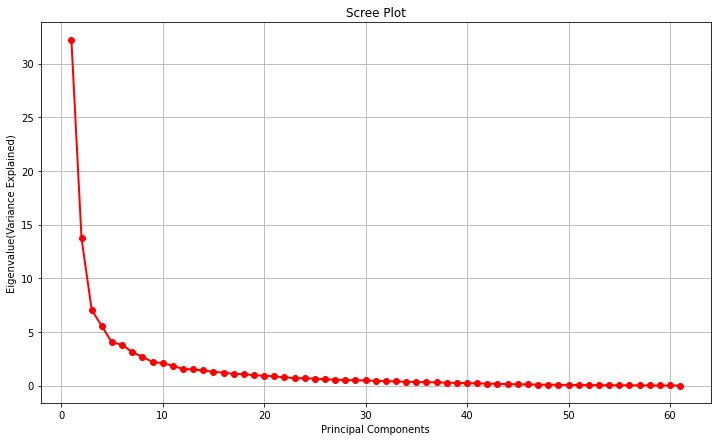

In [33]:
fig = plt.figure(figsize=(12,7))
plt.plot(range(1,62), var, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalue(Variance Explained)')
plt.grid()
plt.show()

In [34]:
#Implementing PCA from sklearn for extracting loadings 
pca = PCA(n_components= 15, random_state=2)
df_pca = pca.fit_transform(scaled_df)
df_pca.transpose()

array([[-5.329805  ,  3.32362356,  0.67235454, ..., 10.11071812,
         9.76096054, 10.52794532],
       [ 3.53088471,  6.19360921, 10.14828224, ...,  2.91949877,
         1.83419888, -0.712345  ],
       [-1.34194047, -4.12737718, -0.66545501, ...,  0.30710121,
         1.81756229,  0.85141186],
       ...,
       [-0.36788052, -0.38226045, -0.89257846, ...,  0.63720273,
         0.2606232 ,  0.63151033],
       [ 1.83516301, -1.10698386,  0.44477647, ..., -0.26829508,
        -0.51374416, -1.49121978],
       [ 0.34979682,  0.68907143,  0.72848196, ...,  0.29529643,
        -0.10606209,  0.22047449]])

In [35]:
pca.explained_variance_

array([19.66629974,  8.3712893 ,  4.30388798,  3.37114462,  2.4478059 ,
        2.32413919,  1.89228055,  1.64141942,  1.33496738,  1.27848592,
        1.11438079,  0.94468587,  0.91106143,  0.85568274,  0.77668645])

In [36]:
pca.components_

array([[ 1.19877500e-01,  1.88812167e-01,  1.91776788e-01,
         1.47095728e-01,  1.78474289e-01,  1.48957302e-01,
         1.92060069e-01,  1.82144045e-01,  1.92613529e-01,
         2.02488225e-01,  2.02569144e-01,  1.65458292e-01,
         2.03094664e-01,  1.93904036e-01,  1.73321885e-01,
         2.06626781e-01,  1.92746657e-01,  2.00173018e-01,
         1.76080498e-01,  1.76378437e-01,  1.72369347e-01,
         1.93696070e-01,  1.38031069e-01,  1.57116644e-01,
         1.35256265e-01,  1.30796749e-01,  1.73400174e-01,
         1.50101348e-01,  1.40095685e-01, -1.24429838e-01,
        -8.30942315e-02,  8.73481327e-02,  5.95326403e-02,
         8.39531441e-02,  2.95720550e-02,  2.97499810e-02,
         2.28690813e-02,  5.81951038e-02,  3.13144925e-02,
         3.62002664e-02,  3.80610780e-02,  4.17682022e-02,
         4.00405019e-02,  3.27146710e-02,  8.82491989e-02,
        -4.84925894e-02,  1.70515027e-02,  5.41535758e-02,
         5.61690176e-02,  5.41582670e-02,  9.91038596e-0

In [37]:
df_pca_loadings = pd.DataFrame(pca.components_,columns=scaled_df.columns)
df_pca_loadings.head()

Equity Paid Up  Networth  Capital Employed  Total Debt  Gross Block   \
0        0.119878  0.188812          0.191777    0.147096      0.178474   
1        0.121149  0.042846          0.107741    0.150733      0.135895   
2       -0.039769  0.054725         -0.004003   -0.076834     -0.042601   
3       -0.135970 -0.055825         -0.088411   -0.076089     -0.072333   
4        0.195128  0.045630          0.132256    0.176918      0.067696   

   Net Working Capital   Current Assets   Current Liabilities and Provisions   \
0              0.148957         0.192060                             0.182144   
1              0.068824         0.117730                             0.127692   
2             -0.010356        -0.043770                            -0.062528   
3             -0.025050        -0.053629                            -0.061766   
4              0.086166         0.132012                             0.125885   

   Total Assets/Liabilities   Gross Sales  ...  PBIDTM (%)[Latest]  \
0                   0.192614     0.202488  ...            0.063489   
1                   0.118938     0.094084  ...           -0.167864   
2                  -0.020839    -0.062012  ...            0.294412   
3                  -0.088269     0.034348  ...           -0.117785   
4                   0.141864     0.054455  ...            0.170585   

   PBITM (%)[Latest]  PBDTM (%)[Latest]  CPM (%)[Latest]  APATM (%)[Latest]  \
0           0.066988           0.064857         0.064229           0.066457   
1          -0.183073          -0.198256        -0.189774          -0.201238   
2           0.288788           0.303279         0.300690           0.287046   
3          -0.096709          -0.095115        -0.100516          -0.073967   
4           0.155617           0.092901         0.093186           0.078215   

   Debtors Velocity (Days)  Creditors Velocity (Days)  \
0                -0.027732                  -0.018951   
1                 0.070152                   0.081866   
2                -0.032917                  -0.060284   
3                -0.118749                  -0.121357   
4                 0.046016                   0.076172   

   Inventory Velocity (Days)  Value of Output/Total Assets  \
0                   0.016568                      0.066958   
1                   0.060523                     -0.062083   
2                  -0.031007                     -0.128919   
3                  -0.034252                      0.365375   
4                   0.007638                     -0.114693   

   Value of Output/Gross Block  
0                     0.023985  
1                    -0.120071  
2                    -0.056961  
3                     0.251622  
4                     0.124195  

[5 rows x 61 columns]

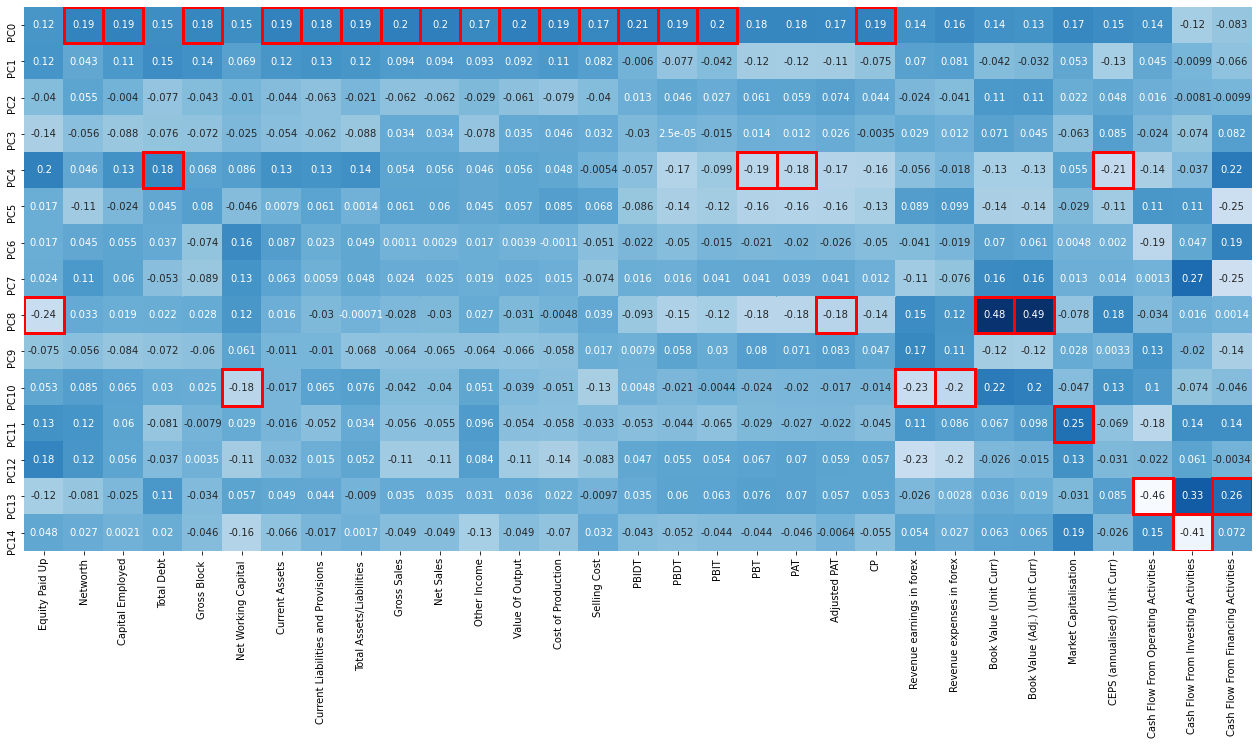

In [38]:
fig, ax = plt.subplots(figsize=(22,10),facecolor = 'w', edgecolor = 'k')
ax = sns.heatmap(df_pca_loadings.iloc[:,0:31], annot = True, cbar = False, cmap= 'Blues', 
             yticklabels = ['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14'], ax=ax)

col_max = df_pca_loadings.iloc[:,0:31].abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loadings.iloc[:,0:31].columns):
    position = df_pca_loadings.iloc[:,0:31].index.get_loc(col_max[variable])
    ax.add_patch(Rectangle((col, position),1, 1, fill = False, edgecolor= 'red', lw=3))

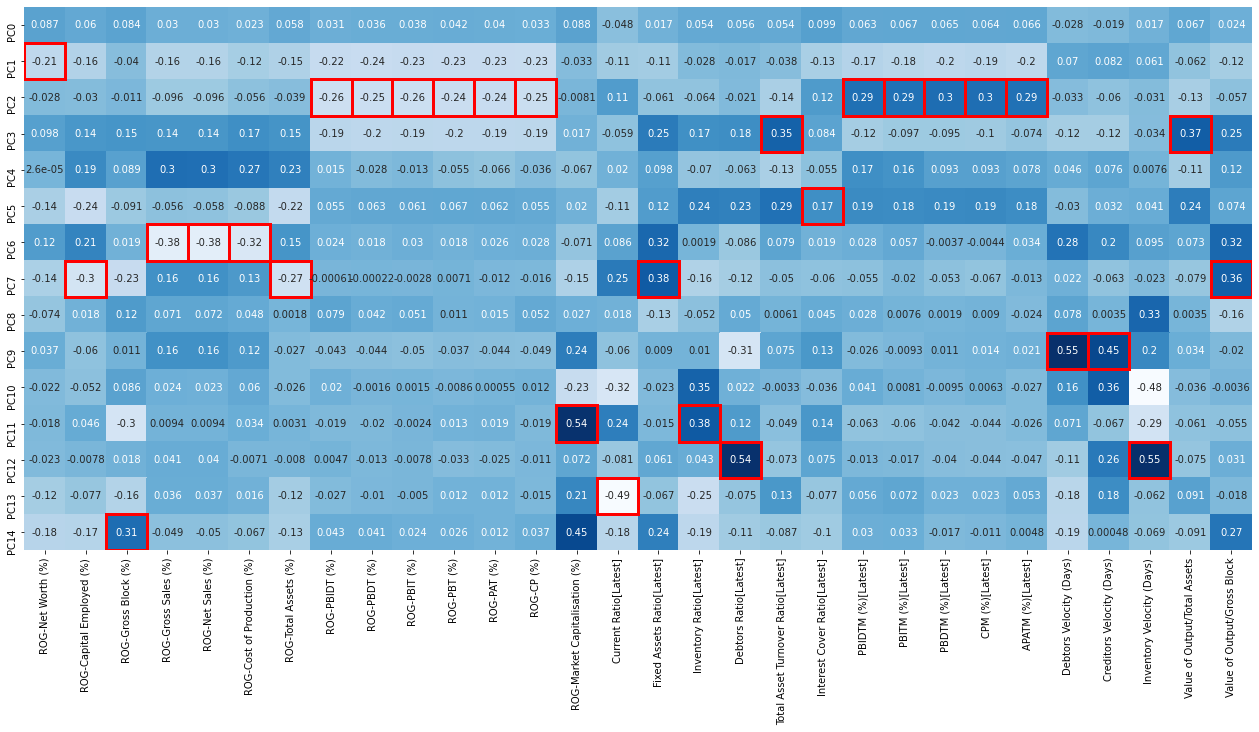

In [39]:
fig, ax = plt.subplots(figsize=(22,10),facecolor = 'w', edgecolor = 'k')
ax = sns.heatmap(df_pca_loadings.iloc[:,31:62], annot = True, cbar = False, cmap= 'Blues', 
             yticklabels = ['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14'], ax=ax)

col_max = df_pca_loadings.iloc[:,31:62].abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loadings.iloc[:,31:62].columns):
    position = df_pca_loadings.iloc[:,31:62].index.get_loc(col_max[variable])
    ax.add_patch(Rectangle((col, position),1, 1, fill = False, edgecolor= 'red', lw=3))

- PC0 - Assets/Costs/Profits 
- PC1 - Equity Paid Up
- PC2 - ROG on Profits - Tax Margin 
- PC3 - Asset Turnover/Output
- PC4 - CEPS
- PC5 - Debtors/ Total Assets/ Interest Cover
- PC6- ROG Sales
- PC7- ROG Capital employed/Total Asset
- PC8 - Book Value (NAV)
- PC9- Debtors/Creditors Velocity(Days)
- PC10 - Revenue earning/expenses in Forex
- PC11 - ROG on gross/capitalisation
- PC12- Debtors Ration/ Inventory velocity
- PC13- Cash Flow Operating/Investing/Financing

In [40]:
df_pc = pd.DataFrame(df_pca, columns = ['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14'])
df_pc.head()

PC0        PC1       PC2       PC3       PC4       PC5       PC6  \
0 -5.329805   3.530885 -1.341940 -2.343446  2.639416  2.192123 -1.525980   
1  3.323624   6.193609 -4.127377 -0.331569  2.737393  1.010832 -1.491488   
2  0.672355  10.148282 -0.665455 -0.734861  3.330826 -1.437295  2.958663   
3 -0.034921   8.238926 -2.340788 -0.024025  3.119756  3.982239 -1.826955   
4 -2.431013   6.089410 -1.530939 -4.160756  3.470401  2.197063  3.072296   

        PC7       PC8       PC9      PC10      PC11      PC12      PC13  \
0 -0.979998 -1.592920 -1.869778 -0.567881  0.227428 -0.367881  1.835163   
1 -2.407330 -1.224220 -1.805477  1.436202  0.820198 -0.382260 -1.106984   
2 -0.974375  1.511458 -1.843986  0.936988  1.953031 -0.892578  0.444776   
3  0.971971 -1.468998 -1.135630  1.483948  1.056339 -0.574761 -1.337211   
4 -1.309607 -0.993565  0.189988  0.154139  0.975369 -0.935716  1.715340   

       PC14  
0  0.349797  
1  0.689071  
2  0.728482  
3 -0.539121  
4 -1.036315

Since PC0-PC13 were able to best represent all the features, PC14 is dropped for further analysis

In [41]:
df_pc.drop('PC14', inplace = True, axis = 1)
df_pc.head()

PC0        PC1       PC2       PC3       PC4       PC5       PC6  \
0 -5.329805   3.530885 -1.341940 -2.343446  2.639416  2.192123 -1.525980   
1  3.323624   6.193609 -4.127377 -0.331569  2.737393  1.010832 -1.491488   
2  0.672355  10.148282 -0.665455 -0.734861  3.330826 -1.437295  2.958663   
3 -0.034921   8.238926 -2.340788 -0.024025  3.119756  3.982239 -1.826955   
4 -2.431013   6.089410 -1.530939 -4.160756  3.470401  2.197063  3.072296   

        PC7       PC8       PC9      PC10      PC11      PC12      PC13  
0 -0.979998 -1.592920 -1.869778 -0.567881  0.227428 -0.367881  1.835163  
1 -2.407330 -1.224220 -1.805477  1.436202  0.820198 -0.382260 -1.106984  
2 -0.974375  1.511458 -1.843986  0.936988  1.953031 -0.892578  0.444776  
3  0.971971 -1.468998 -1.135630  1.483948  1.056339 -0.574761 -1.337211  
4 -1.309607 -0.993565  0.189988  0.154139  0.975369 -0.935716  1.715340

In [42]:
df_pc.shape

(3586, 14)

In [43]:
#Transforming Target variable into 0 and 1
cr_df_new['Networth Next Year'] = np.where(cr_df_new['Networth Next Year'] > 0, 0, cr_df_new['Networth Next Year'])
cr_df_new['Networth Next Year'] = np.where(cr_df_new['Networth Next Year'] < 0, 1, cr_df_new['Networth Next Year'])

In [44]:
cr_df_new.head()

Networth Next Year  Equity Paid Up  Networth  Capital Employed  Total Debt  \
0                 1.0        43.16875  -166.215        -320.90125      180.83   
1                 1.0        43.16875  -166.215         555.10875      180.83   
2                 1.0        43.16875   287.405         555.10875      180.83   
3                 1.0        43.16875  -166.215         555.10875      180.83   
4                 1.0        43.16875  -166.215         555.10875      180.83   

   Gross Block   Net Working Capital   Current Assets   \
0      328.8825             -89.40625         40.50000   
1      328.8825             -89.40625        332.19375   
2      328.8825             151.52375        332.19375   
3      328.8825             -89.40625        332.19375   
4      328.8825             151.52375        332.19375   

   Current Liabilities and Provisions   Total Assets/Liabilities   ...  \
0                            163.02625                   109.6000  ...   
1                            163.02625                   760.5175  ...   
2                            163.02625                   760.5175  ...   
3                            163.02625                   760.5175  ...   
4                            163.02625                   760.5175  ...   

   PBIDTM (%)[Latest]  PBITM (%)[Latest]  PBDTM (%)[Latest]  CPM (%)[Latest]  \
0               0.000              0.000              0.000            0.000   
1             -10.300            -21.435            -21.165          -17.085   
2             -28.485            -21.435            -21.165          -17.085   
3              -3.330             -7.210            -21.165          -17.085   
4             -28.485            -21.435            -21.165           28.475   

   APATM (%)[Latest]  Debtors Velocity (Days)  Creditors Velocity (Days)  \
0              0.000                      0.0                        0.0   
1            -11.115                     29.0                      101.0   
2            -11.115                     97.0                      210.5   
3            -11.115                     93.0                       63.0   
4             18.525                    253.0                      210.5   

   Inventory Velocity (Days)  Value of Output/Total Assets  \
0                       45.0                          0.00   
1                        2.0                          0.31   
2                        0.0                         -0.03   
3                        2.0                          0.24   
4                        0.0                          0.01   

   Value of Output/Gross Block  
0                         0.00  
1                         0.24  
2                        -0.26  
3                         1.90  
4                         0.05  

[5 rows x 65 columns]

In [45]:
cr_df_new['Networth Next Year'].unique()

array([1., 0.])

In [46]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

encoded = encode.fit_transform(cr_df_new['Networth Next Year'])

encoded

array([1, 1, 1, ..., 0, 0, 0])

In [47]:
df_pc['NextYear_Networth'] = encoded
df_pc.head()

PC0        PC1       PC2       PC3       PC4       PC5       PC6  \
0 -5.329805   3.530885 -1.341940 -2.343446  2.639416  2.192123 -1.525980   
1  3.323624   6.193609 -4.127377 -0.331569  2.737393  1.010832 -1.491488   
2  0.672355  10.148282 -0.665455 -0.734861  3.330826 -1.437295  2.958663   
3 -0.034921   8.238926 -2.340788 -0.024025  3.119756  3.982239 -1.826955   
4 -2.431013   6.089410 -1.530939 -4.160756  3.470401  2.197063  3.072296   

        PC7       PC8       PC9      PC10      PC11      PC12      PC13  \
0 -0.979998 -1.592920 -1.869778 -0.567881  0.227428 -0.367881  1.835163   
1 -2.407330 -1.224220 -1.805477  1.436202  0.820198 -0.382260 -1.106984   
2 -0.974375  1.511458 -1.843986  0.936988  1.953031 -0.892578  0.444776   
3  0.971971 -1.468998 -1.135630  1.483948  1.056339 -0.574761 -1.337211   
4 -1.309607 -0.993565  0.189988  0.154139  0.975369 -0.935716  1.715340   

   NextYear_Networth  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1

In [48]:
df_pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PC0                3586 non-null   float64
 1   PC1                3586 non-null   float64
 2   PC2                3586 non-null   float64
 3   PC3                3586 non-null   float64
 4   PC4                3586 non-null   float64
 5   PC5                3586 non-null   float64
 6   PC6                3586 non-null   float64
 7   PC7                3586 non-null   float64
 8   PC8                3586 non-null   float64
 9   PC9                3586 non-null   float64
 10  PC10               3586 non-null   float64
 11  PC11               3586 non-null   float64
 12  PC12               3586 non-null   float64
 13  PC13               3586 non-null   float64
 14  NextYear_Networth  3586 non-null   int64  
dtypes: float64(14), int64(1)
memory usage: 420.4 KB


In [49]:
y1 = df_pc['NextYear_Networth']

In [50]:
df_pc.drop('NextYear_Networth', axis = 1, inplace = True)

# Train Test Split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(df_pc, y1, test_size = 0.33, random_state=42)

In [52]:
display("Train Data (x):", x_train.shape)
display("Train Data (y):", y_train.shape)
display("Test Data (x):", x_test.shape)
display("Test Data (y):", y_test.shape)

'Train Data (x):'

(2402, 14)

'Train Data (y):'

(2402,)

'Test Data (x):'

(1184, 14)

'Test Data (y):'

(1184,)

In [53]:
df_train = pd.concat([x_train, y_train], axis =1)
df_test = pd.concat([x_test, y_test], axis =1)

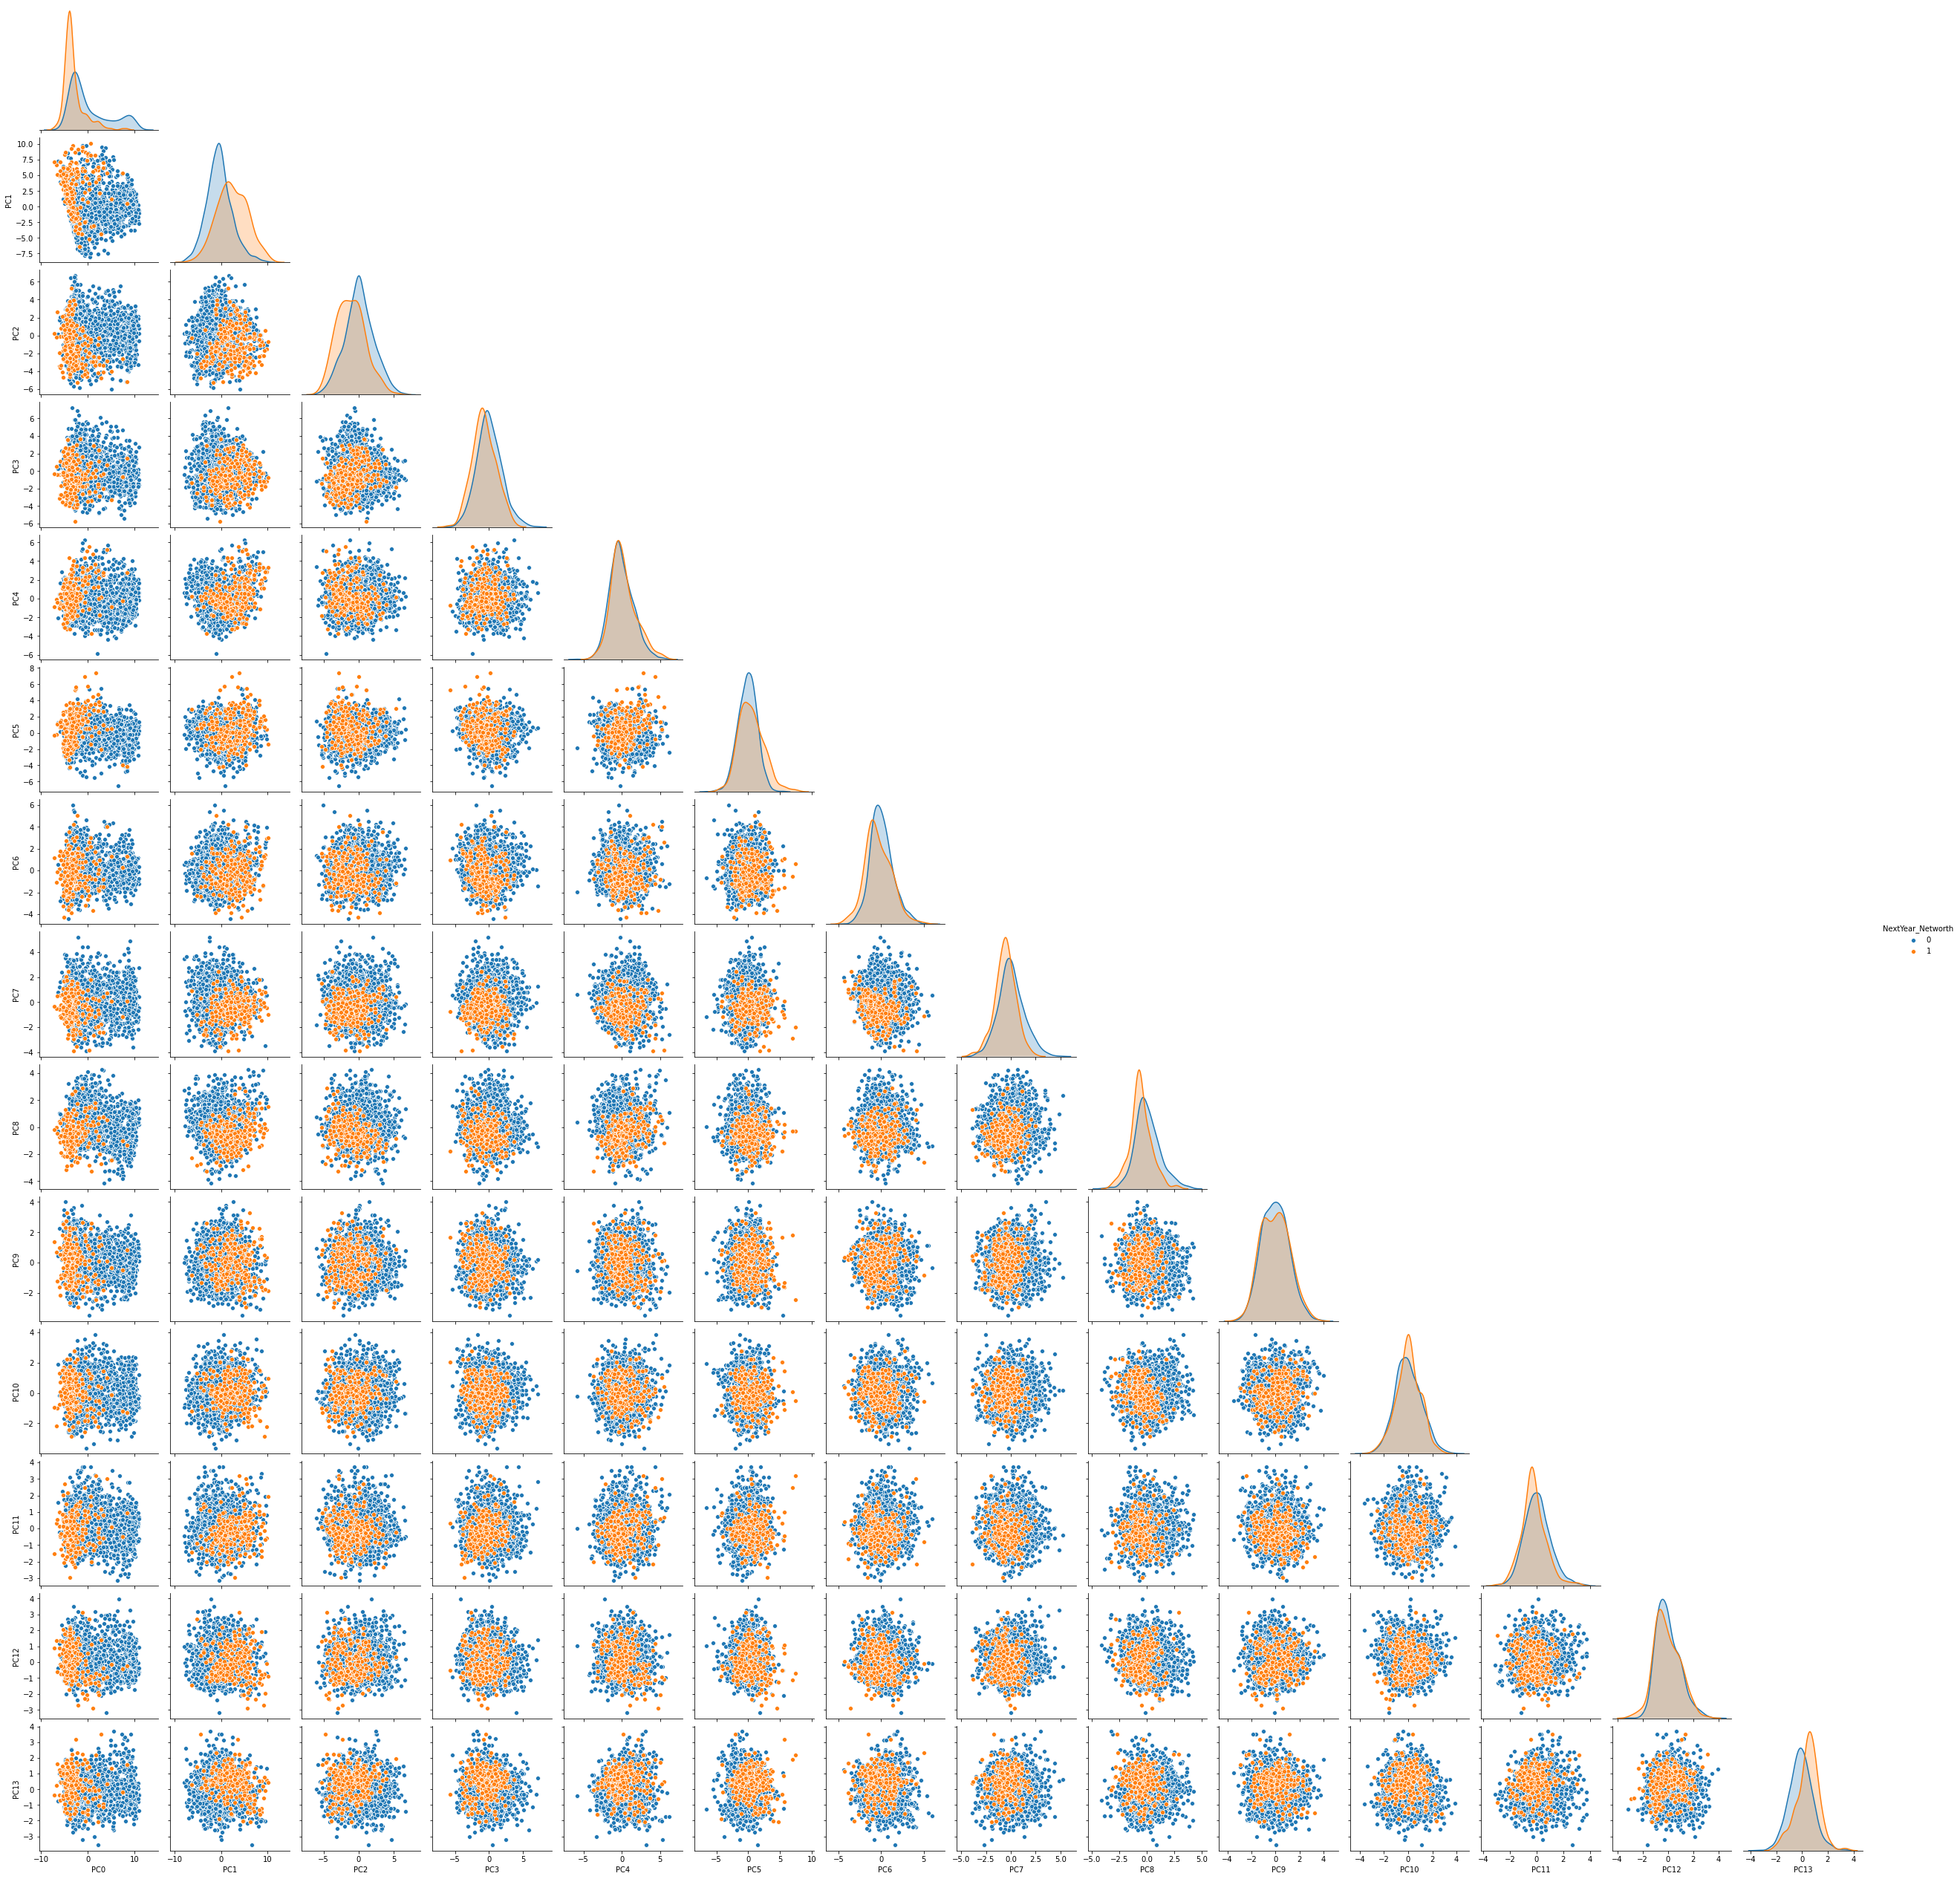

In [54]:
sns.pairplot(df_train, hue = 'NextYear_Networth', corner = True)
plt.show()

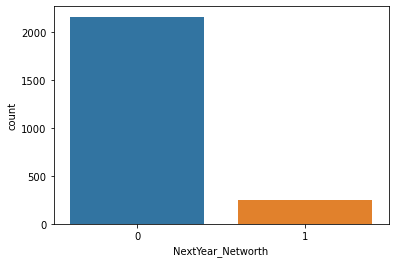

0    0.898002
1    0.101998
Name: NextYear_Networth, dtype: float64


In [55]:
sns.countplot(df_train['NextYear_Networth'])
plt.show()
print(df_train['NextYear_Networth'].value_counts(normalize = True))

# SMOTE for unbalance data

In [56]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)
x_smote, y_smote = sm.fit_sample(x_train, y_train)

In [57]:
display("Train Data after SMOTE (x):", x_smote.shape)
display("Train Data after SMOTE (y):", y_smote.shape)

'Train Data after SMOTE (x):'

(4314, 14)

'Train Data after SMOTE (y):'

(4314,)

In [58]:
df_train_smote = pd.concat([x_smote, y_smote], axis =1)

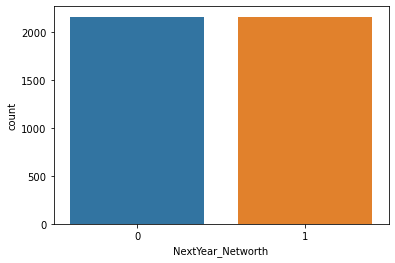

1    0.5
0    0.5
Name: NextYear_Networth, dtype: float64


In [59]:
sns.countplot(df_train_smote['NextYear_Networth'])
plt.show()
print(df_train_smote['NextYear_Networth'].value_counts(normalize = True))

# Importing Stats Model module

In [60]:
import statsmodels.formula.api as sm

form = 'NextYear_Networth ~  PC0 + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + PC11 + PC12 + PC13'


In [61]:
model_lr = sm.logit(form, data = df_train_smote).fit()

Optimization terminated successfully.
         Current function value: 0.188383
         Iterations 9


In [62]:
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      NextYear_Networth   No. Observations:                 4314
Model:                          Logit   Df Residuals:                     4299
Method:                           MLE   Df Model:                           14
Date:                Thu, 18 Feb 2021   Pseudo R-squ.:                  0.7282
Time:                        15:07:53   Log-Likelihood:                -812.69
converged:                       True   LL-Null:                       -2990.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.1025      0.218    -23.369      0.000      -5.530      -4.675
PC0           -0.8534      0.045    -18.882      0.000      -0.942      -0.765
PC1            0.7522      0.034     21.916      0.000       0.685       0.819
PC2           -1.0687      0.053    -20.284      0.000      -1.172      -0.965
PC3           -0.4305      0.045     -9.500      0.000      -0.519      -0.342
PC4            0.7836      0.074     10.650      0.000       0.639       0.928
PC5            0.7256      0.054     13.368      0.000       0.619       0.832
PC6           -0.5352      0.053    -10.067      0.000      -0.639      -0.431
PC7           -1.3354      0.077    -17.452      0.000      -1.485      -1.185
PC8           -2.4797      0.140    -17.680      0.000      -2.755      -2.205
PC9            0.4911      0.071      6.933      0.000       0.352       0.630
PC10          -0.9999      0.098    -10.228      0.000      -1.191      -0.808
PC11          -1.0604      0.089    -11.928      0.000      -1.235      -0.886
PC12          -0.4190      0.088     -4.788      0.000      -0.591      -0.247
PC13           1.3110      0.100     13.074      0.000       1.114       1.508
==============================================================================

Possibly complete quasi-separation: A fraction 0.20 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

From the above summary it is observed that all the 14 independant variables have 
p- values less than 0.05 so we can say they have significant relationship with Networth Next Year

PC8, PC7, PC10, PC2, PC0 seem to have more impact on the networth_next year variable than others.

Having close look at these components we can say, 

Book Value(NAV), Revenue in Forex due to expenses/earnings, Rate of growth due to Capital employed/Total Asset and Profits and Equity Paid up are influencing the networth for following year of the companies.

In [63]:
predict_train_prob = model_lr.predict(df_train_smote)
predict_test_prob = model_lr.predict(df_test)

In [64]:
predict_train=[]
for i in range(0,len(predict_train_prob)):
    if np.array(predict_train_prob)[i]>0.5:
        a=1
    else:
        a=0
    predict_train.append(a)

In [65]:
predict_test=[]
for i in range(0,len(predict_test_prob)):
    if np.array(predict_test_prob)[i]>0.5:
        a=1
    else:
        a=0
    predict_test.append(a)

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report, roc_auc_score, f1_score

In [67]:
print("Acuuracy:")
print("Train Data:\n", accuracy_score(y_smote, predict_train))
print("Test Data:\n", accuracy_score(y_test, predict_test))

Acuuracy:
Train Data:
 0.930227167362077
Test Data:
 0.8826013513513513


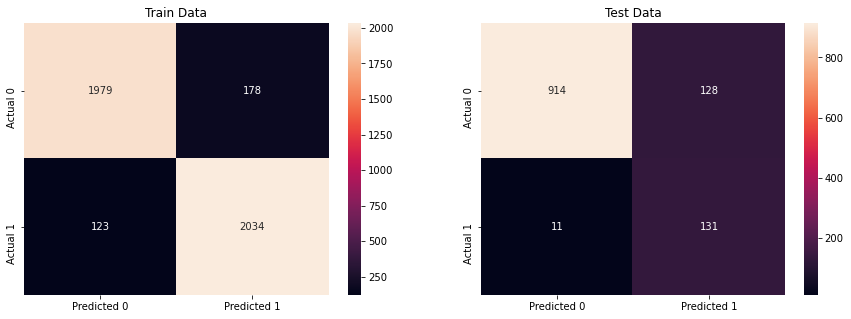

In [68]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1, title = 'Train Data')
sns.heatmap(confusion_matrix(y_smote, predict_train), annot = True, xticklabels= ['Predicted 0', 'Predicted 1'], 
           yticklabels= ['Actual 0', 'Actual 1'], fmt='.5g')
plt.subplot(1,2,2, title = 'Test Data')
sns.heatmap(confusion_matrix(y_test, predict_test), annot = True, xticklabels= ['Predicted 0', 'Predicted 1'],
           yticklabels= ['Actual 0', 'Actual 1'], fmt='.5g')
plt.show()

In [69]:
print("Train Data:\n",classification_report(y_smote, predict_train))
print("Test Data:\n",classification_report(y_test, predict_test))

Train Data:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      2157
           1       0.92      0.94      0.93      2157

    accuracy                           0.93      4314
   macro avg       0.93      0.93      0.93      4314
weighted avg       0.93      0.93      0.93      4314

Test Data:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      1042
           1       0.51      0.92      0.65       142

    accuracy                           0.88      1184
   macro avg       0.75      0.90      0.79      1184
weighted avg       0.93      0.88      0.90      1184



ACU_Train : 0.9784400241668778

ACU_Test : 0.9696885728961099


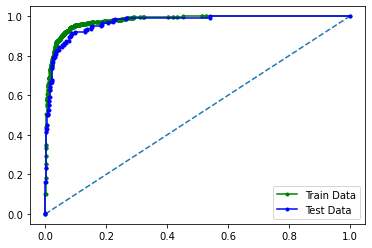

In [70]:
fpr, tpr, threshold = roc_curve(y_smote, predict_train_prob)
fpr1, tpr1, threshold = roc_curve(y_test, predict_test_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker = '.', label = 'Train Data', color='green')
plt.plot(fpr1, tpr1, marker = '.', label = 'Test Data', color='blue')
plt.legend()
print("ACU_Train :", roc_auc_score(y_smote, predict_train_prob))
print("\nACU_Test :", roc_auc_score(y_test, predict_test_prob))
plt.show()

# Ramdom Forest

In [71]:
rf = RandomForestClassifier(random_state= 189)

rf.fit(x_smote, y_smote)

RandomForestClassifier(random_state=189)

In [72]:
predict_train_rf = rf.predict(x_smote)
predict_test_rf = rf.predict(x_test)

In [73]:
print("Acuuracy:")
print("Train Data:\n", accuracy_score(y_smote, predict_train_rf))
print("Test Data:\n", accuracy_score(y_test, predict_test_rf))

Acuuracy:
Train Data:
 1.0
Test Data:
 0.9206081081081081


In [87]:
pd.DataFrame({"Features": x_smote.columns ,  'Importance' : rf.feature_importances_})

Features  Importance
0       PC0    0.183461
1       PC1    0.146606
2       PC2    0.088262
3       PC3    0.045772
4       PC4    0.043535
5       PC5    0.065190
6       PC6    0.037506
7       PC7    0.086989
8       PC8    0.070301
9       PC9    0.026674
10     PC10    0.029184
11     PC11    0.043734
12     PC12    0.033535
13     PC13    0.099251

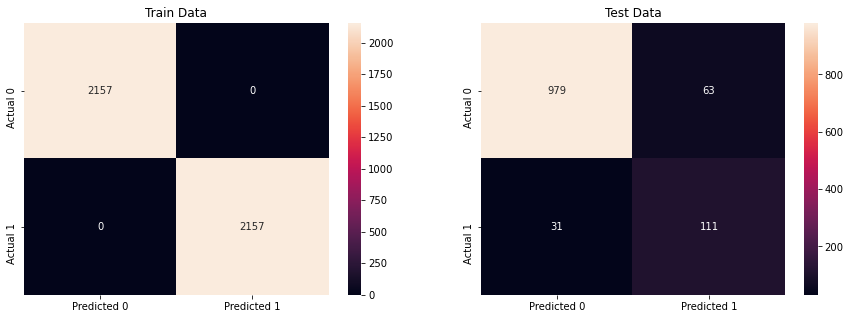

In [74]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1, title = 'Train Data')
sns.heatmap(confusion_matrix(y_smote, predict_train_rf), annot = True, xticklabels= ['Predicted 0', 'Predicted 1'], 
           yticklabels= ['Actual 0', 'Actual 1'], fmt='.5g')
plt.subplot(1,2,2, title = 'Test Data')
sns.heatmap(confusion_matrix(y_test, predict_test_rf), annot = True, xticklabels= ['Predicted 0', 'Predicted 1'],
           yticklabels= ['Actual 0', 'Actual 1'], fmt='.5g')
plt.show() 

In [75]:
print("Train Data:\n",classification_report(y_smote, predict_train_rf))
print("Test Data:\n",classification_report(y_test, predict_test_rf))

Train Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2157
           1       1.00      1.00      1.00      2157

    accuracy                           1.00      4314
   macro avg       1.00      1.00      1.00      4314
weighted avg       1.00      1.00      1.00      4314

Test Data:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      1042
           1       0.64      0.78      0.70       142

    accuracy                           0.92      1184
   macro avg       0.80      0.86      0.83      1184
weighted avg       0.93      0.92      0.92      1184



ACU_Train : 1.0

ACU_Test : 0.9491024843880944


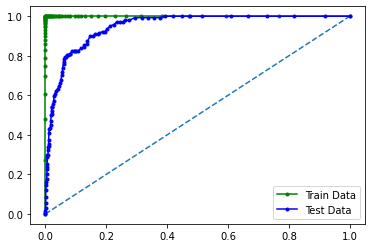

In [76]:
prob_train = rf.predict_proba(x_smote)
prob_test = rf.predict_proba(x_test)

fpr, tpr, threshold = roc_curve(y_smote, prob_train[:,1])
fpr1, tpr1, threshold = roc_curve(y_test, prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker = '.', label = 'Train Data', color='green')
plt.plot(fpr1, tpr1, marker = '.', label = 'Test Data', color='blue')
plt.legend()
print("ACU_Train :", roc_auc_score(y_smote, prob_train[:,1]))
print("\nACU_Test :", roc_auc_score(y_test, prob_test[:,1]))
plt.show()

# LDA

In [77]:
LDA = LinearDiscriminantAnalysis()

LDA.fit(x_smote, y_smote)

LinearDiscriminantAnalysis()

In [78]:
predict_train_LDA = LDA.predict(x_smote)
predict_test_LDA = LDA.predict(x_test)

In [79]:
print("Acuuracy:")
print("Train Data:\n", accuracy_score(y_smote, predict_train_LDA))
print("Test Data:\n", accuracy_score(y_test, predict_test_LDA))

Acuuracy:
Train Data:
 0.9068150208623088
Test Data:
 0.8378378378378378


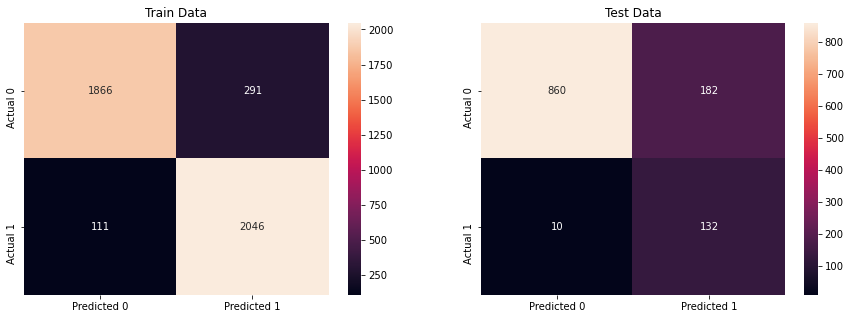

In [80]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1, title = 'Train Data')
sns.heatmap(confusion_matrix(y_smote, predict_train_LDA), annot = True, xticklabels= ['Predicted 0', 'Predicted 1'], 
           yticklabels= ['Actual 0', 'Actual 1'], fmt='.5g')
plt.subplot(1,2,2, title = 'Test Data')
sns.heatmap(confusion_matrix(y_test, predict_test_LDA), annot = True, xticklabels= ['Predicted 0', 'Predicted 1'],
           yticklabels= ['Actual 0', 'Actual 1'], fmt='.5g')
plt.show()

In [81]:
print("Train Data:\n",classification_report(y_smote, predict_train_LDA))
print("Test Data:\n",classification_report(y_test, predict_test_LDA))

Train Data:
               precision    recall  f1-score   support

           0       0.94      0.87      0.90      2157
           1       0.88      0.95      0.91      2157

    accuracy                           0.91      4314
   macro avg       0.91      0.91      0.91      4314
weighted avg       0.91      0.91      0.91      4314

Test Data:
               precision    recall  f1-score   support

           0       0.99      0.83      0.90      1042
           1       0.42      0.93      0.58       142

    accuracy                           0.84      1184
   macro avg       0.70      0.88      0.74      1184
weighted avg       0.92      0.84      0.86      1184



ACU_Train : 0.9683457746329027

ACU_Test : 0.9516098510448487


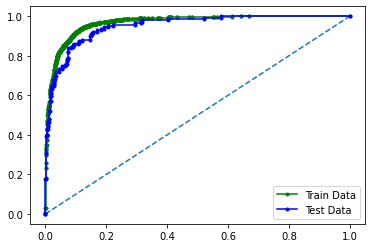

In [82]:
prob_train_lda = LDA.predict_proba(x_smote)
prob_test_lda = LDA.predict_proba(x_test)

fpr, tpr, threshold = roc_curve(y_smote, prob_train_lda[:,1])
fpr1, tpr1, threshold = roc_curve(y_test, prob_test_lda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker = '.', label = 'Train Data', color='green')
plt.plot(fpr1, tpr1, marker = '.', label = 'Test Data', color='blue')
plt.legend()
print("ACU_Train :", roc_auc_score(y_smote, prob_train_lda[:,1]))
print("\nACU_Test :", roc_auc_score(y_test, prob_test_lda[:,1]))
plt.show()

In [83]:
compare_model = pd.DataFrame({'Acuracy': [accuracy_score(y_test, predict_test), accuracy_score(y_test, predict_test_rf), accuracy_score(y_test, predict_test_LDA)], 
                       'f1-score': [f1_score(y_test, predict_test), f1_score(y_test, predict_test_rf), f1_score(y_test, predict_test_LDA)],
                             'AUC': [roc_auc_score(y_test, predict_test_prob), roc_auc_score(y_test, prob_test[:,1]), roc_auc_score(y_test, prob_test_lda[:,1])]}, index = ['Logit', 'Randomforest', 'LDA'])

In [84]:
compare_model

Acuracy  f1-score       AUC
Logit         0.882601  0.653367  0.969689
Randomforest  0.920608  0.702532  0.949102
LDA           0.837838  0.578947  0.951610

# Market Risk

In [2]:
df = pd.read_csv("Market+Risk+Dataset.csv")
df.head()

Date  Infosys  Indian Hotel  Mahindra & Mahindra  Axis Bank  SAIL  \
0  31-03-2014      264            69                  455        263    68   
1  07-04-2014      257            68                  458        276    70   
2  14-04-2014      254            68                  454        270    68   
3  21-04-2014      253            68                  488        283    68   
4  28-04-2014      256            65                  482        282    63   

   Shree Cement  Sun Pharma  Jindal Steel  Idea Vodafone  Jet Airways  
0          5543         555           298             83          278  
1          5728         610           279             84          303  
2          5649         607           279             83          280  
3          5692         604           274             83          282  
4          5582         611           238             79          243

In [3]:
df.columns = df.columns.str.strip().str.replace(' ', '_')
df.head()

Date  Infosys  Indian_Hotel  Mahindra_&_Mahindra  Axis_Bank  SAIL  \
0  31-03-2014      264            69                  455        263    68   
1  07-04-2014      257            68                  458        276    70   
2  14-04-2014      254            68                  454        270    68   
3  21-04-2014      253            68                  488        283    68   
4  28-04-2014      256            65                  482        282    63   

   Shree_Cement  Sun_Pharma  Jindal_Steel  Idea_Vodafone  Jet_Airways  
0          5543         555           298             83          278  
1          5728         610           279             84          303  
2          5649         607           279             83          280  
3          5692         604           274             83          282  
4          5582         611           238             79          243

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra_&_Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [5]:
df['date'] = [pd.to_datetime(d) for d in df['Date']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 314 non-null    object        
 1   Infosys              314 non-null    int64         
 2   Indian_Hotel         314 non-null    int64         
 3   Mahindra_&_Mahindra  314 non-null    int64         
 4   Axis_Bank            314 non-null    int64         
 5   SAIL                 314 non-null    int64         
 6   Shree_Cement         314 non-null    int64         
 7   Sun_Pharma           314 non-null    int64         
 8   Jindal_Steel         314 non-null    int64         
 9   Idea_Vodafone        314 non-null    int64         
 10  Jet_Airways          314 non-null    int64         
 11  date                 314 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 29.6+ KB


In [7]:
df.describe()

Infosys  Indian_Hotel  Mahindra_&_Mahindra   Axis_Bank        SAIL  \
count  314.000000    314.000000           314.000000  314.000000  314.000000   
mean   511.340764    114.560510           636.678344  540.742038   59.095541   
std    135.952051     22.509732           102.879975  115.835569   15.810493   
min    234.000000     64.000000           284.000000  263.000000   21.000000   
25%    424.000000     96.000000           572.000000  470.500000   47.000000   
50%    466.500000    115.000000           625.000000  528.000000   57.000000   
75%    630.750000    134.000000           678.000000  605.250000   71.750000   
max    810.000000    157.000000           956.000000  808.000000  104.000000   

       Shree_Cement   Sun_Pharma  Jindal_Steel  Idea_Vodafone  Jet_Airways  
count    314.000000   314.000000    314.000000     314.000000   314.000000  
mean   14806.410828   633.468153    147.627389      53.713376   372.659236  
std     4288.275085   171.855893     65.879195      31.248985   202.262668  
min     5543.000000   338.000000     53.000000       3.000000    14.000000  
25%    10952.250000   478.500000     88.250000      25.250000   243.250000  
50%    16018.500000   614.000000    142.500000      53.000000   376.000000  
75%    17773.250000   785.000000    182.750000      82.000000   534.000000  
max    24806.000000  1089.000000    338.000000     117.000000   871.000000

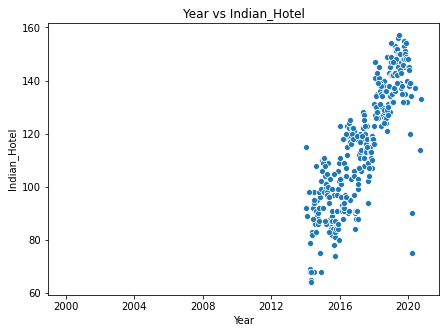

In [10]:
plt.figure(figsize= (7,5))
sns.scatterplot(df['date'], df['Indian_Hotel'])
plt.xlabel('Year')
plt.ylabel('Indian_Hotel')
plt.title('Year vs Indian_Hotel')
#plt.xlim(right=2)
plt.show()

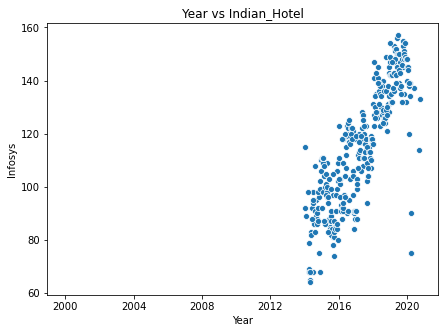

In [45]:
plt.figure(figsize= (7,5))
sns.scatterplot(df['date'], df['Indian_Hotel'])
plt.xlabel('Year')
plt.ylabel('Infosys')
plt.title('Year vs Indian_Hotel')
plt.show()

# Analyzing Returns

In [48]:
df_returns = np.log(df.drop(['Date', 'date'], axis= 1)).diff(axis = 0, periods = 1) 

In [50]:
df_returns.head()

Infosys  Indian_Hotel  Mahindra_&_Mahindra  Axis_Bank      SAIL  \
0       NaN           NaN                  NaN        NaN       NaN   
1 -0.026873     -0.014599             0.006572   0.048247  0.028988   
2 -0.011742      0.000000            -0.008772  -0.021979 -0.028988   
3 -0.003945      0.000000             0.072218   0.047025  0.000000   
4  0.011788     -0.045120            -0.012371  -0.003540 -0.076373   

   Shree_Cement  Sun_Pharma  Jindal_Steel  Idea_Vodafone  Jet_Airways  
0           NaN         NaN           NaN            NaN          NaN  
1      0.032831    0.094491     -0.065882       0.011976     0.086112  
2     -0.013888   -0.004930      0.000000      -0.011976    -0.078943  
3      0.007583   -0.004955     -0.018084       0.000000     0.007117  
4     -0.019515    0.011523     -0.140857      -0.049393    -0.148846

In [51]:
df_returns.mean()

Infosys                0.002794
Indian_Hotel           0.000266
Mahindra_&_Mahindra   -0.001506
Axis_Bank              0.001167
SAIL                  -0.003463
Shree_Cement           0.003681
Sun_Pharma            -0.001455
Jindal_Steel          -0.004123
Idea_Vodafone         -0.010608
Jet_Airways           -0.009548
dtype: float64

In [52]:
df_returns.std()

Infosys                0.035070
Indian_Hotel           0.047131
Mahindra_&_Mahindra    0.040169
Axis_Bank              0.045828
SAIL                   0.062188
Shree_Cement           0.039917
Sun_Pharma             0.045033
Jindal_Steel           0.075108
Idea_Vodafone          0.104315
Jet_Airways            0.097972
dtype: float64

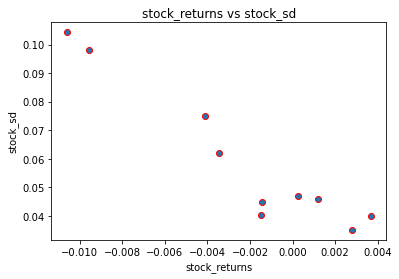

In [53]:
plt.scatter(df_returns.mean(), df_returns.std(), edgecolors='r')
plt.xlabel('stock_returns')
plt.ylabel('stock_sd')
plt.title('stock_returns vs stock_sd')
plt.show()